**Setting up dataset**  

**Import necessary libraries**

In [1]:
import pandas as pd

**Add data**

In [2]:
!wget https://usrbb.ru/botainika/BOR_DATA.xlsx

--2025-10-12 21:45:17--  https://usrbb.ru/botainika/BOR_DATA.xlsx
Resolving usrbb.ru (usrbb.ru)... 213.141.129.202
Connecting to usrbb.ru (usrbb.ru)|213.141.129.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154275 (151K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘BOR_DATA.xlsx’

BOR_DATA.xlsx       100%[===================>] 150.66K   430KB/s    in 0.3s    

2025-10-12 21:45:18 (430 KB/s) - ‘BOR_DATA.xlsx’ saved [154275/154275]



**Read data**

In [3]:
df = pd.read_excel('BOR_DATA.xlsx', sheet_name=0)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,V_REF,dd_REF,p_REF,SO2_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,2.29,262.26,984.82,12.38,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,1.31,285.60,984.89,13.25,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,2.17,303.21,984.63,12.83,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,2.54,281.19,984.46,13.24,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,1.66,271.27,984.50,13.59,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove different columns from REF and N23 datasets**  
**Reset table index**

In [4]:
df.drop(columns=['V_REF', 'dd_REF', 'p_REF', 'SO2_REF'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Counting missing values per each column**

In [5]:
df.isnull().sum()

,0
Date,0
T_REF,1440
rH_REF,1440
PM10_REF,1448
PM25_REF,1448
T_N23,189
rH_N23,189
PM10_N23,189
PM25_N23,189


**Remove all rows with at least 1 missing value**  
**Reset table index**

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
394,2021-06-07 03:00:00,15.85,80.52,15.20,12.31,20.445312,56.215625,8.146406,6.466563
395,2021-06-07 04:00:00,13.80,87.39,13.40,12.09,20.076562,57.034375,8.942656,7.043125
396,2021-06-07 05:00:00,13.84,89.05,12.91,11.59,19.709375,56.848438,7.653906,6.487344
397,2021-06-07 06:00:00,17.38,78.50,24.28,16.25,19.107813,60.307813,8.069688,6.921406


**Counting missing values per each column**

In [7]:
df.isnull().sum()

,0
Date,0
T_REF,0
rH_REF,0
PM10_REF,0
PM25_REF,0
T_N23,0
rH_N23,0
PM10_N23,0
PM25_N23,0


**Analyzing dataset**

**Import necessary libraries**

In [8]:
import matplotlib.pyplot as plt

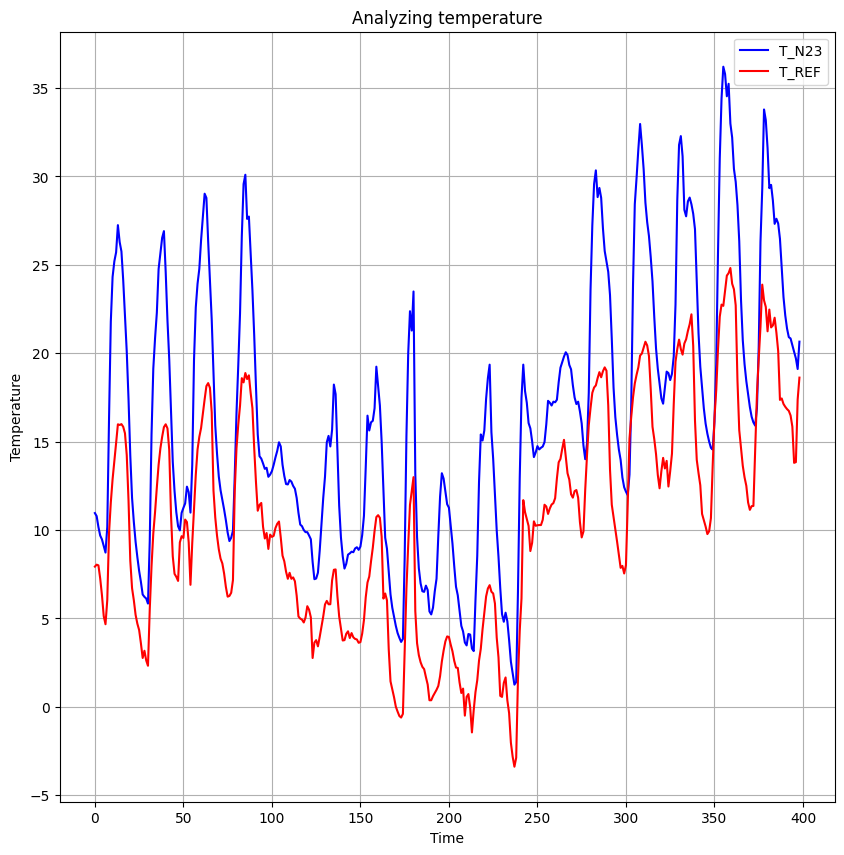

In [9]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing temperature')

plt.plot(df['T_N23'], label='T_N23', color='blue')
plt.plot(df['T_REF'], label='T_REF', color='red')

plt.xlabel('Time')
plt.ylabel('Temperature')

plt.grid(True)
plt.legend()

plt.show()

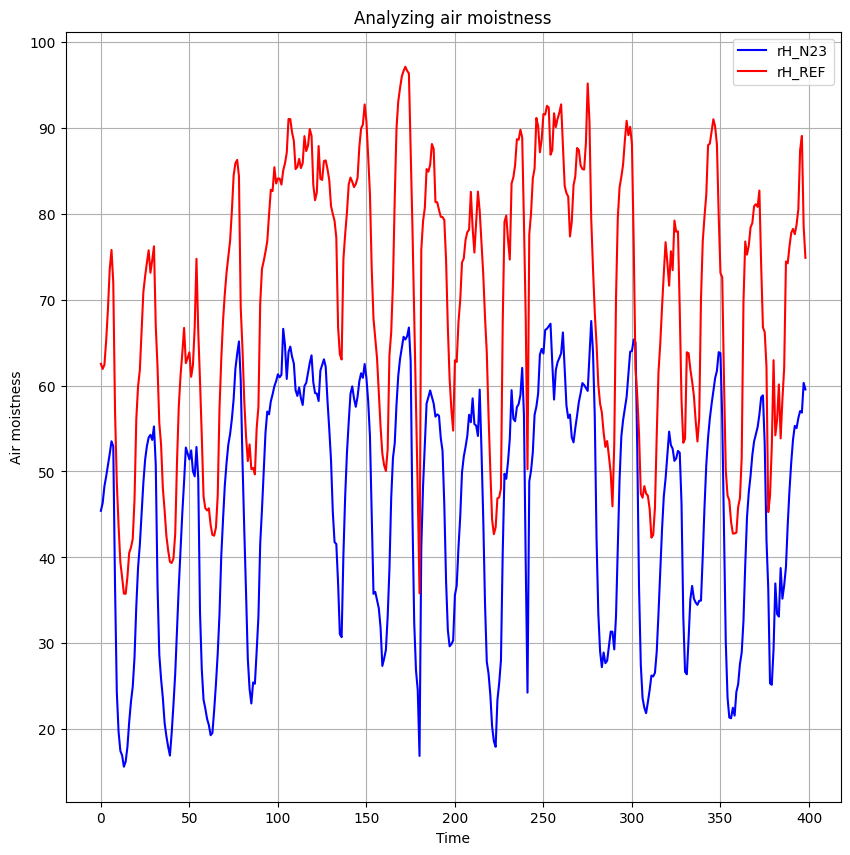

In [10]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing air moistness')

plt.plot(df['rH_N23'], label='rH_N23', color='blue')
plt.plot(df['rH_REF'], label='rH_REF', color='red')

plt.xlabel('Time')
plt.ylabel('Air moistness')

plt.grid(True)
plt.legend()

plt.show()

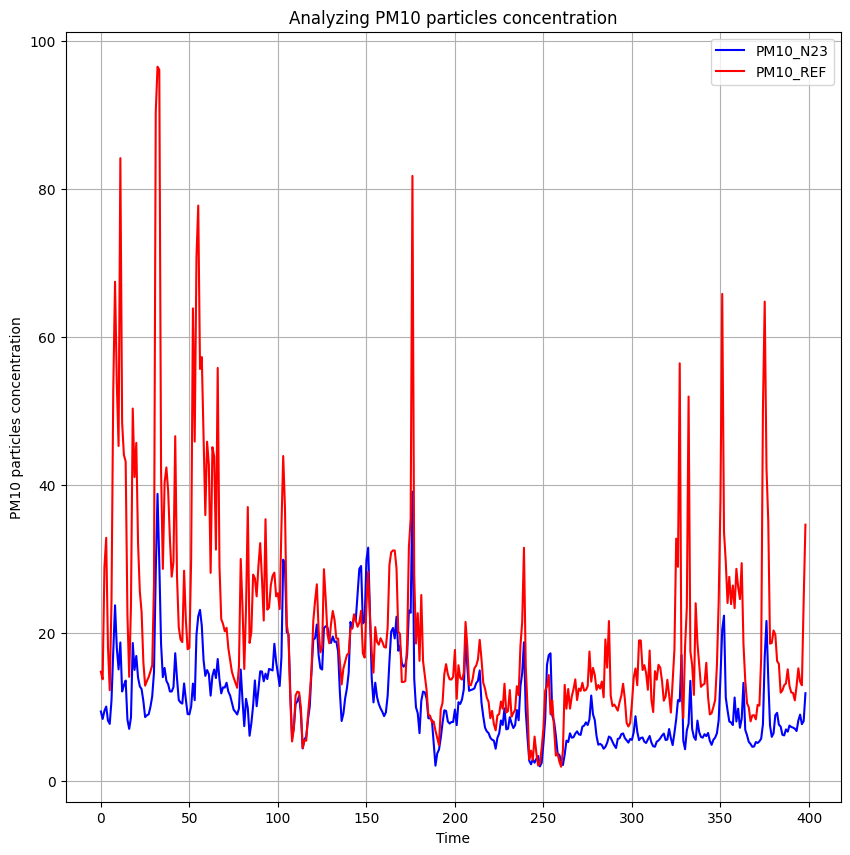

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM10 particles concentration')

plt.plot(df['PM10_N23'], label='PM10_N23', color='blue')
plt.plot(df['PM10_REF'], label='PM10_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM10 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

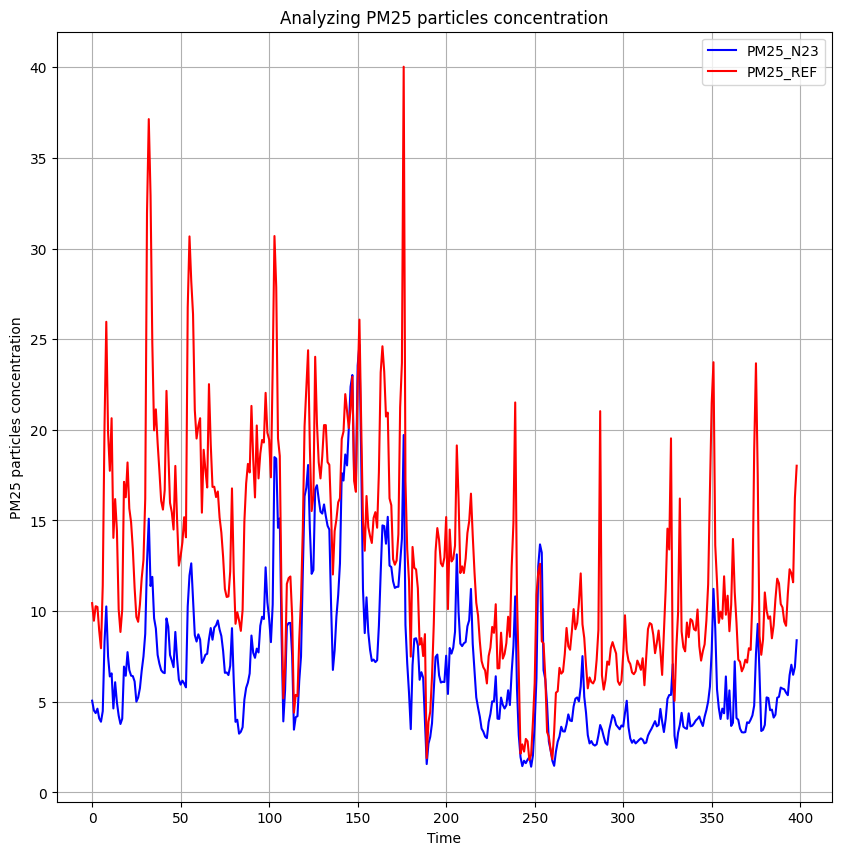

In [12]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM25 particles concentration')

plt.plot(df['PM25_N23'], label='PM25_N23', color='blue')
plt.plot(df['PM25_REF'], label='PM25_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM25 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

/tmp/ipython-input-2605106177.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


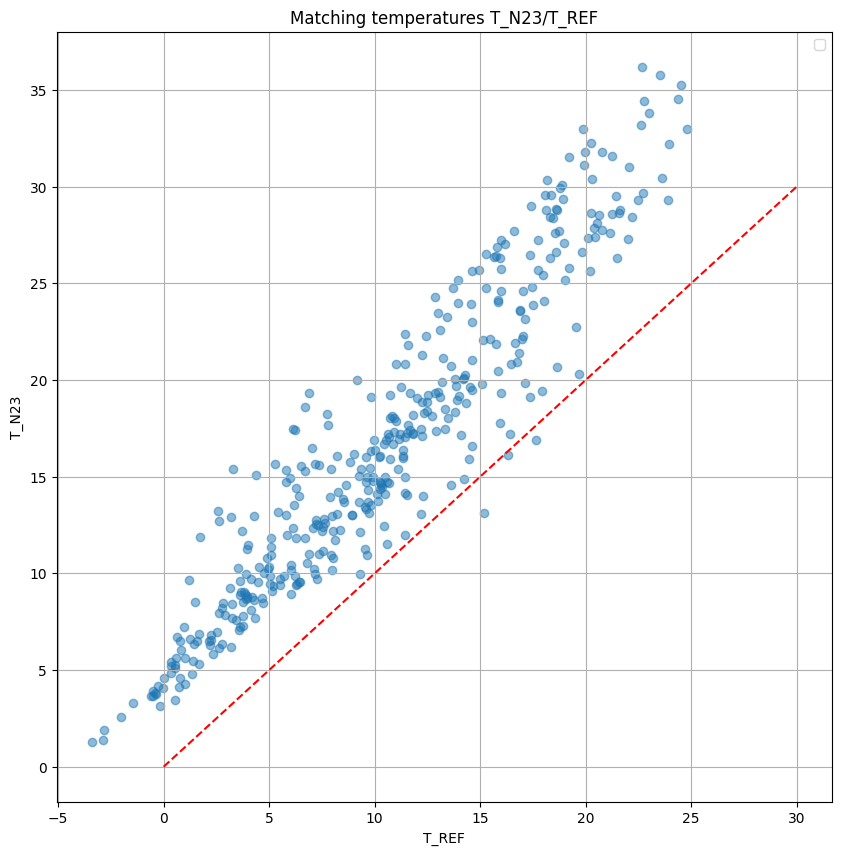

In [13]:
plt.figure(figsize=(10, 10))
plt.title('Matching temperatures T_N23/T_REF')

plt.scatter(df['T_REF'], df['T_N23'], alpha=0.5)

plt.xlabel('T_REF')
plt.ylabel('T_N23')

lim=[0, 30]
plt.plot(lim, lim, 'r--') # draw the line of ideal matching

plt.grid(True)
plt.legend()

plt.show()

/tmp/ipython-input-1352436809.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


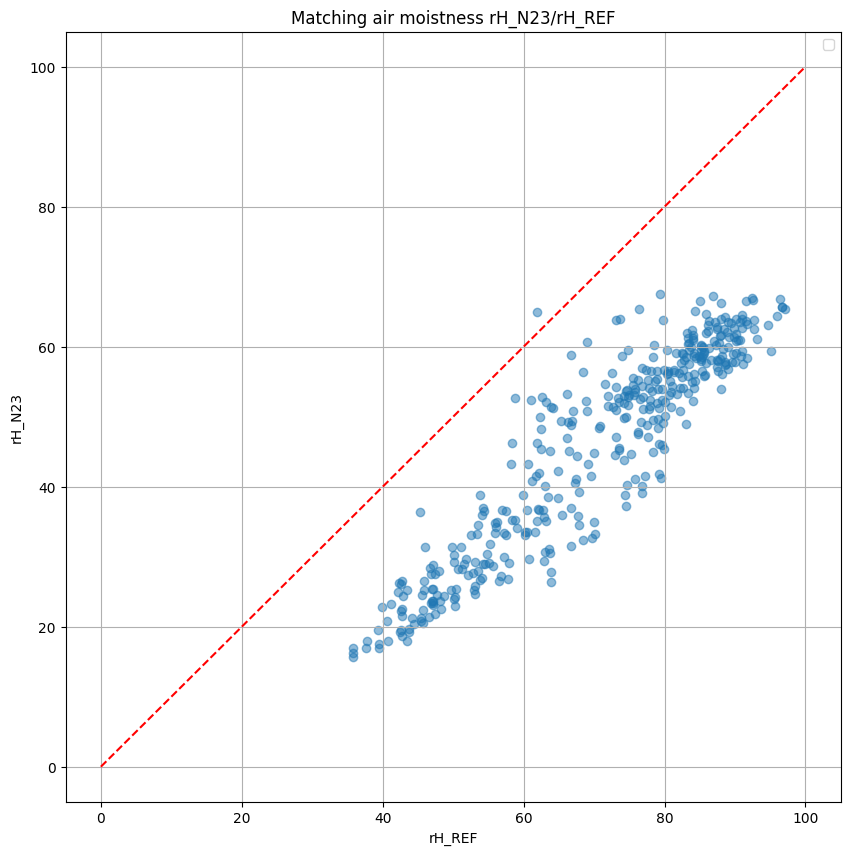

In [14]:
plt.figure(figsize=(10, 10))
plt.title('Matching air moistness rH_N23/rH_REF')

plt.scatter(df['rH_REF'], df['rH_N23'], alpha=0.5)

plt.xlabel('rH_REF')
plt.ylabel('rH_N23')

lim=[0, 100]
plt.plot(lim, lim, 'r--') # draw the line of ideal matching

plt.grid(True)
plt.legend()

plt.show()

/tmp/ipython-input-2506864492.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


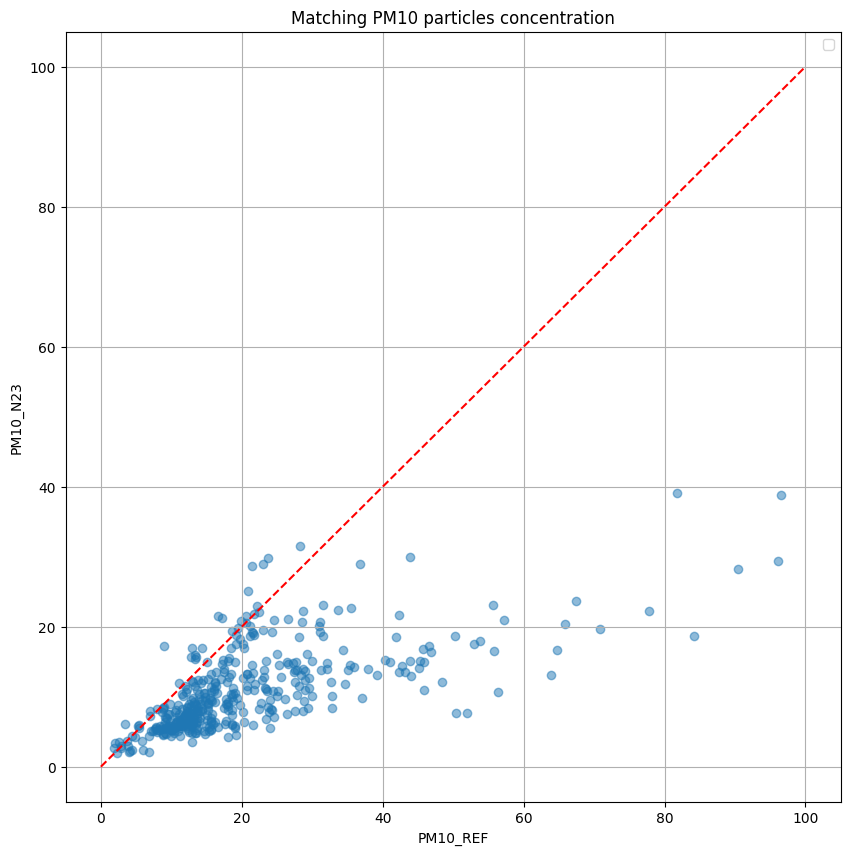

In [15]:
plt.figure(figsize=(10, 10))
plt.title('Matching PM10 particles concentration')

plt.scatter(df['PM10_REF'], df['PM10_N23'], alpha=0.5)

plt.xlabel('PM10_REF')
plt.ylabel('PM10_N23')

lim=[0, 100]
plt.plot(lim, lim, 'r--') # draw the line of ideal matching

plt.grid(True)
plt.legend()

plt.show()

/tmp/ipython-input-4116561829.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


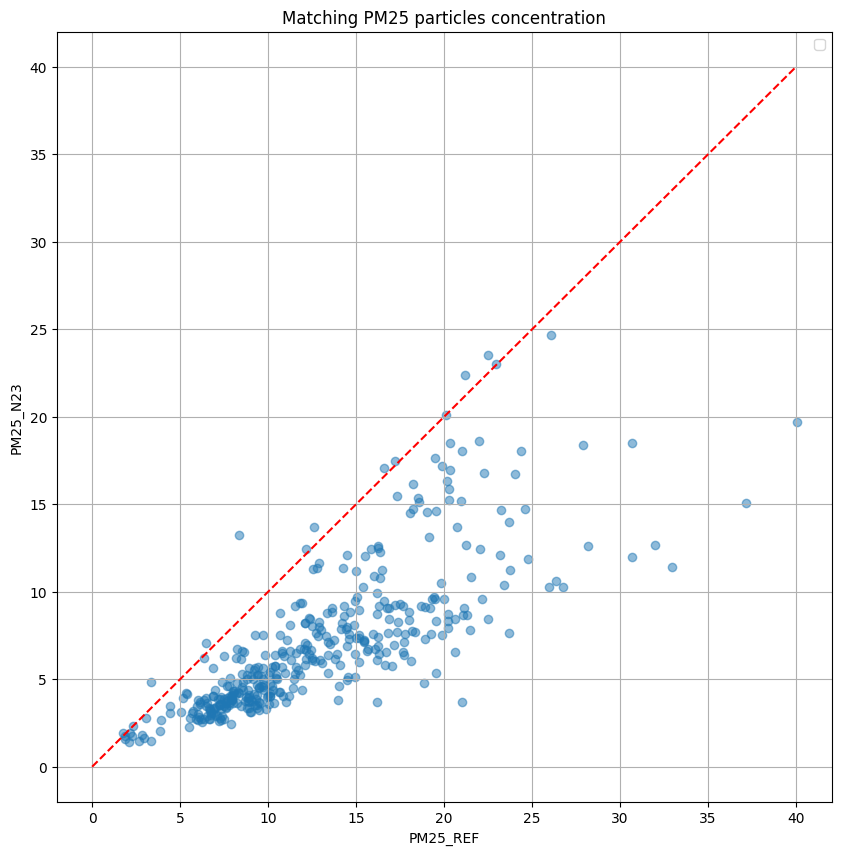

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Matching PM25 particles concentration')

plt.scatter(df['PM25_REF'], df['PM25_N23'], alpha=0.5)

plt.xlabel('PM25_REF')
plt.ylabel('PM25_N23')

lim=[0, 40]
plt.plot(lim, lim, 'r--') # draw the line of ideal matching

plt.grid(True)
plt.legend()

plt.show()

<Axes: >

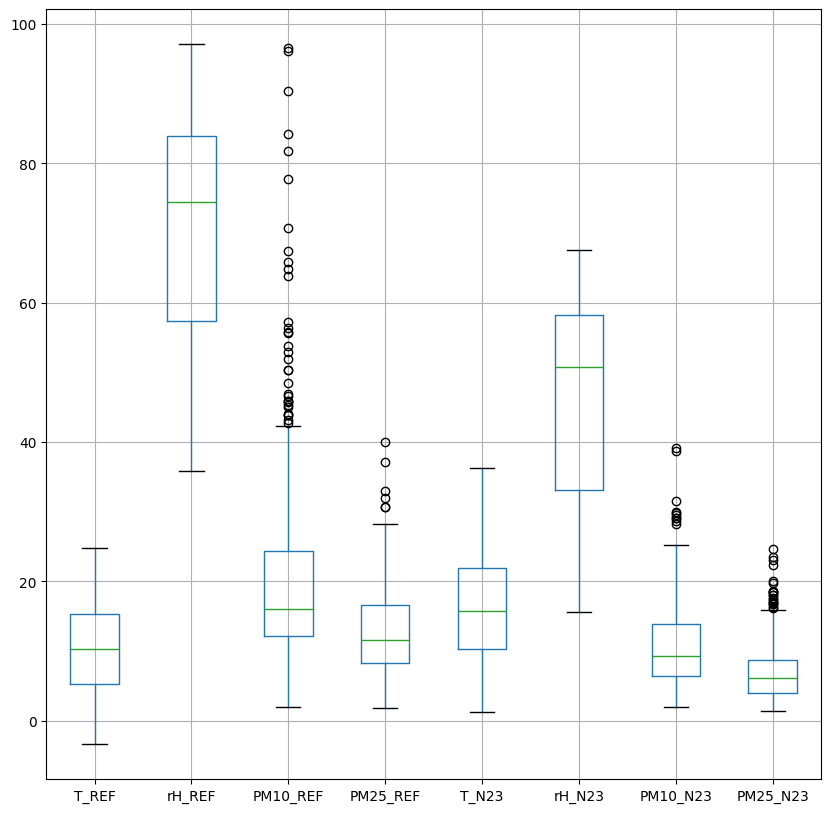

In [17]:
df.boxplot(figsize=(10, 10))

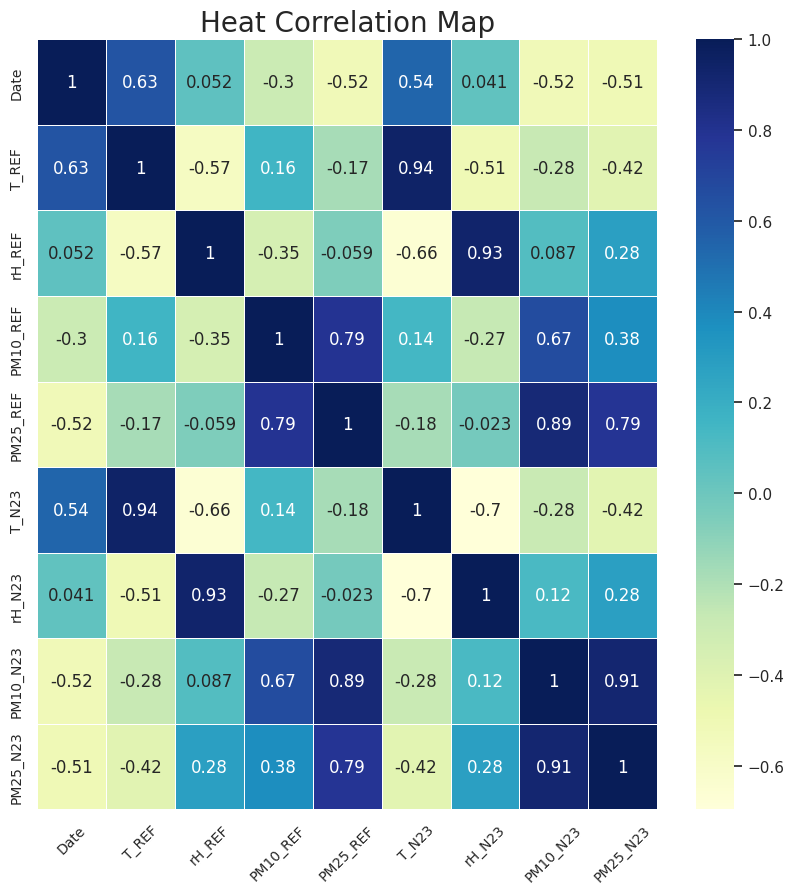

In [18]:
import seaborn as sns; sns.set()

def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (10, 10)})
        sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.7) # draw the heat correlation map
        plt.xticks(rotation=45, size=10)
        plt.yticks(size=10)
        plt.title('Heat Correlation Map', size=20)
        plt.show()

correlated_map(df[df.columns[:]], plot=True)

In [19]:
df.describe()

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
count,399,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,2021-04-28 01:54:26.195489024,10.456591,70.384962,20.599900,12.780050,16.619106,45.814321,10.911947,7.057779
min,2021-03-30 00:00:42,-3.390000,35.770000,1.900000,1.780000,1.253125,15.645312,1.947187,1.416094
25%,2021-04-03 03:30:44,5.250000,57.405000,12.190000,8.230000,10.321875,33.110937,6.378281,3.923047
50%,2021-04-07 15:00:46,10.280000,74.440000,16.100000,11.590000,15.673438,50.784375,9.310156,6.087188
75%,2021-06-03 03:30:00,15.370000,83.935000,24.310000,16.590000,21.977344,58.185937,13.919844,8.755781
max,2021-06-07 07:00:00,24.820000,97.100000,96.530000,40.030000,36.206250,67.512500,39.077188,24.687812
std,NaN,6.419375,15.777433,14.529506,6.071627,7.824079,14.465804,6.004264,4.207290


**Training models**

**Import necessary libraries**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from itertools import combinations

import xgboost as xgb

In [21]:
final_table_by_rmse = []

all_results = [] # make list in order to save all model results
model_results = {'T_REF':[], 'rH_REF':[], 'PM10_REF':[], 'PM25_REF':[]} # make dict in order to save model results for each target
original_by_target = {} # make dict in order to save correct original values for each target

class ModelResult:
    def __init__(self, model, name, predictions, metrics):
        self.model = model
        self.name = name
        self.predictions = predictions
        self.metrics = metrics

In [22]:
def TrainTestResultLinearRegression(X, Y, target):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # split the initial dataset into train and test sequences
    original_by_target[target] = Y_test

    model = LinearRegression() # create model
    model.fit(X_train, Y_train) # train model

    Y_pred = model.predict(X_test) # make predictions

    result = ModelResult(model, f'LinearRegression {",".join(X.columns.to_list())} and target {target}', Y_pred,
        {'R2': r2_score(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': root_mean_squared_error(Y_test, Y_pred)})

    final_table_by_rmse.append(result) # save model results
    all_results.append(result) # save model results
    model_results[target].append(result) # save model results

**Considering all possible feature combinations**

In [23]:
def generate_unique_feature_combinations(features):
    for k in range(1, len(features) + 1):
        for combination in combinations(features, k):
            yield list(combination)


# initial targets
all_targets = ['T_REF', 'rH_REF', 'PM10_REF', 'PM25_REF']

# initial features
all_features = ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23']

# considering all possible unique feature combinations
for target in all_targets:
    for unique_feature_combination in generate_unique_feature_combinations(all_features):

        print(f'Training model using features: {unique_feature_combination} and target {target}')

        # setting up data
        X = df[unique_feature_combination]
        Y = df[target]

        # training model and saving result
        TrainTestResultLinearRegression(X, Y, target)

Training model using features: ['T_N23'] and target T_REF
Training model using features: ['rH_N23'] and target T_REF
Training model using features: ['PM10_N23'] and target T_REF
Training model using features: ['PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23'] and target T_REF
Training model using features: ['T_N23', 'PM10_N23'] and target T_REF
Training model using features: ['T_N23', 'PM25_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM10_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM25_N23'] and target T_REF
Training model using features: ['PM10_N23', 'PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23', 'PM10_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23', 'PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Training mode

In [24]:
pd.set_option('display.max_colwidth', None)

metrics_df = pd.DataFrame({
    result.name: result.metrics for i, result in zip(range(len(all_results)), all_results)
}).T

print('Model metrics:')
print(metrics_df.sort_values('RMSE', ascending=True))

Model metrics:
                                                                           R2  \
LinearRegression T_N23,rH_N23,PM10_N23,PM25_N23 and target T_REF     0.937956   
LinearRegression T_N23,rH_N23,PM10_N23 and target T_REF              0.932270   
LinearRegression T_N23,rH_N23 and target T_REF                       0.931769   
LinearRegression T_N23,rH_N23,PM25_N23 and target T_REF              0.931576   
LinearRegression T_N23,PM10_N23,PM25_N23 and target T_REF            0.878978   
LinearRegression T_N23 and target T_REF                              0.877979   
LinearRegression T_N23,PM25_N23 and target T_REF                     0.877447   
LinearRegression T_N23,PM10_N23 and target T_REF                     0.877325   
LinearRegression PM10_N23,PM25_N23 and target PM25_REF               0.827318   
LinearRegression PM10_N23 and target PM25_REF                        0.825563   
LinearRegression T_N23,PM10_N23,PM25_N23 and target PM25_REF         0.821273   
LinearRegress

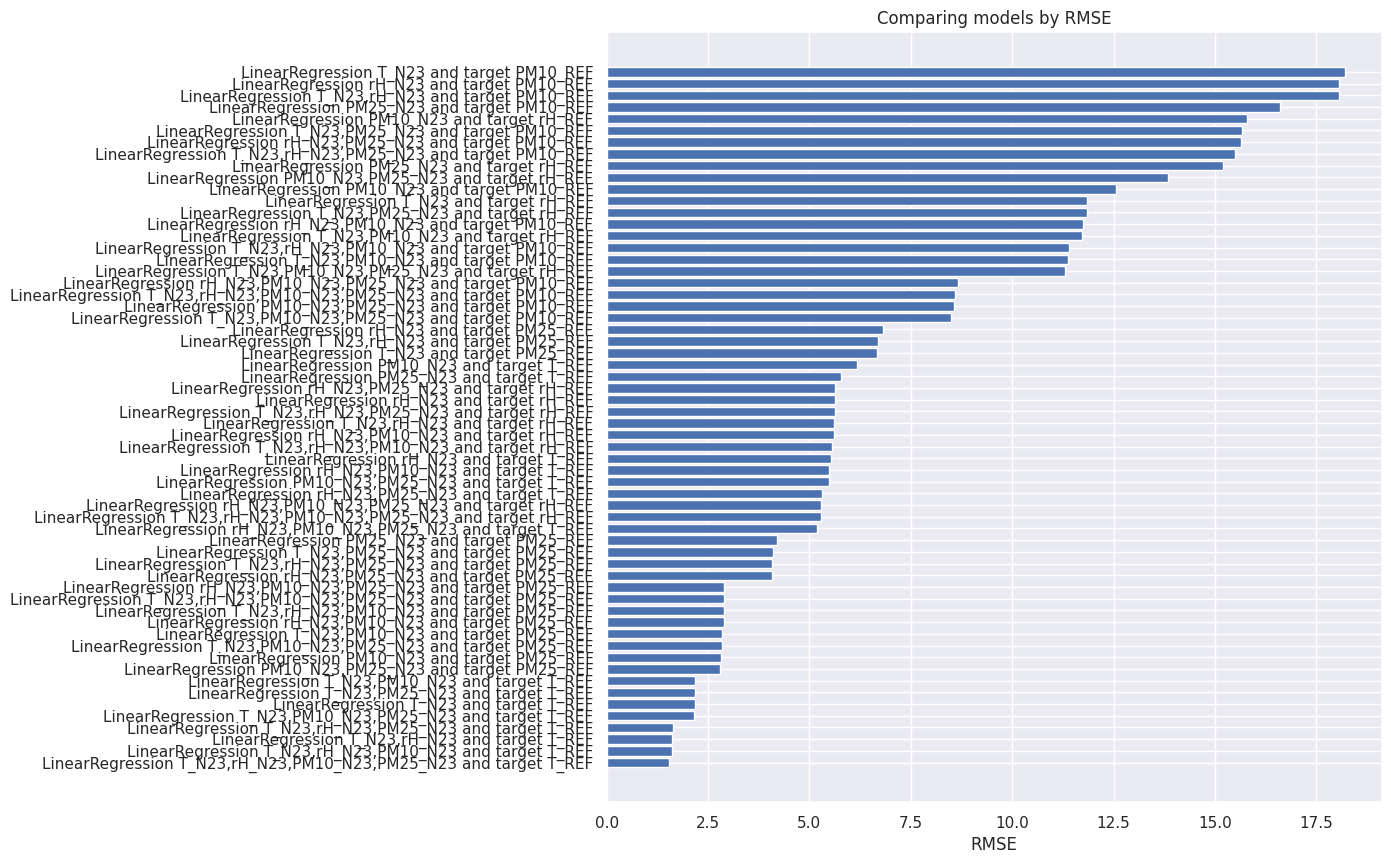

In [25]:
# sort model results by RMSE
sorted_results = sorted(all_results, key=lambda x: x.metrics['RMSE'])

plt.figure(figsize=(10, 10))
plt.title('Comparing models by RMSE')

plt.barh(
    [result.name for result in sorted_results],
    [result.metrics['RMSE'] for result in sorted_results]
)

plt.xlabel('RMSE')
plt.show()

In [26]:
for target in all_targets:
    plt.figure(figsize=(20, 20))
    plt.title('Matching models predictions')

    # actual values graph
    plt.plot(original_by_target[target].values[:100], label='ACTUAL', color='black')

    # models predictions graphs
    for result in model_results[target]:
        plt.plot(result.predictions[:100],
                linestyle='--',
                label=result.name)

    plt.xlabel('Time')
    plt.ylabel(target)

    plt.grid(True)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [27]:
all_results = [] # make list in order to save all model results
model_results = {'T_REF':[], 'rH_REF':[], 'PM10_REF':[], 'PM25_REF':[]} # make dict in order to save model results for each target
original_by_target = {} # make dict in order to save correct original values for each target

In [28]:
def TrainTestResultRandomForest(X, Y, target):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # split the initial dataset into train and test sequences
    original_by_target[target] = Y_test

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42) # create model
    model.fit(X_train, Y_train) # train model

    Y_pred = model.predict(X_test) # make predictions

    result = ModelResult(model, f'RandomForest {",".join(X.columns.to_list())} and target {target}', Y_pred,
        {'R2': r2_score(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': root_mean_squared_error(Y_test, Y_pred)})

    final_table_by_rmse.append(result) # save model results
    all_results.append(result) # save model results
    model_results[target].append(result) # save model results

**Considering all possible feature combinations**

In [29]:
# initial targets
all_targets = ['T_REF', 'rH_REF', 'PM10_REF', 'PM25_REF']

# initial features
all_features = ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23']

# considering all possible unique feature combinations
for target in all_targets:
    for unique_feature_combination in generate_unique_feature_combinations(all_features):

        print(f'Training model using features: {unique_feature_combination} and target {target}')

        # setting up data
        X = df[unique_feature_combination]
        Y = df[target]

        # training model and saving result
        TrainTestResultRandomForest(X, Y, target)

Training model using features: ['T_N23'] and target T_REF
Training model using features: ['rH_N23'] and target T_REF
Training model using features: ['PM10_N23'] and target T_REF
Training model using features: ['PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23'] and target T_REF
Training model using features: ['T_N23', 'PM10_N23'] and target T_REF
Training model using features: ['T_N23', 'PM25_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM10_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM25_N23'] and target T_REF
Training model using features: ['PM10_N23', 'PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23', 'PM10_N23'] and target T_REF
Training model using features: ['T_N23', 'rH_N23', 'PM25_N23'] and target T_REF
Training model using features: ['T_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Training mode

In [30]:
pd.set_option('display.max_colwidth', None)

metrics_df = pd.DataFrame({
    result.name: result.metrics for i, result in zip(range(len(all_results)), all_results)
}).T

print('Model metrics:')
print(metrics_df.sort_values('RMSE', ascending=True))

Model metrics:
                                                                       R2  \
RandomForest T_N23,rH_N23,PM10_N23 and target T_REF              0.936303   
RandomForest T_N23,rH_N23,PM10_N23,PM25_N23 and target T_REF     0.928717   
RandomForest T_N23,rH_N23,PM25_N23 and target T_REF              0.923837   
RandomForest T_N23,rH_N23 and target T_REF                       0.923695   
RandomForest T_N23,PM10_N23 and target T_REF                     0.861447   
RandomForest T_N23,PM10_N23,PM25_N23 and target T_REF            0.859235   
RandomForest T_N23,PM25_N23 and target T_REF                     0.836762   
RandomForest T_N23 and target T_REF                              0.802945   
RandomForest T_N23,PM10_N23,PM25_N23 and target PM25_REF         0.786062   
RandomForest T_N23,rH_N23,PM10_N23,PM25_N23 and target PM25_REF  0.776591   
RandomForest rH_N23,PM10_N23,PM25_N23 and target PM25_REF        0.766782   
RandomForest T_N23,rH_N23,PM10_N23 and target PM25_REF       

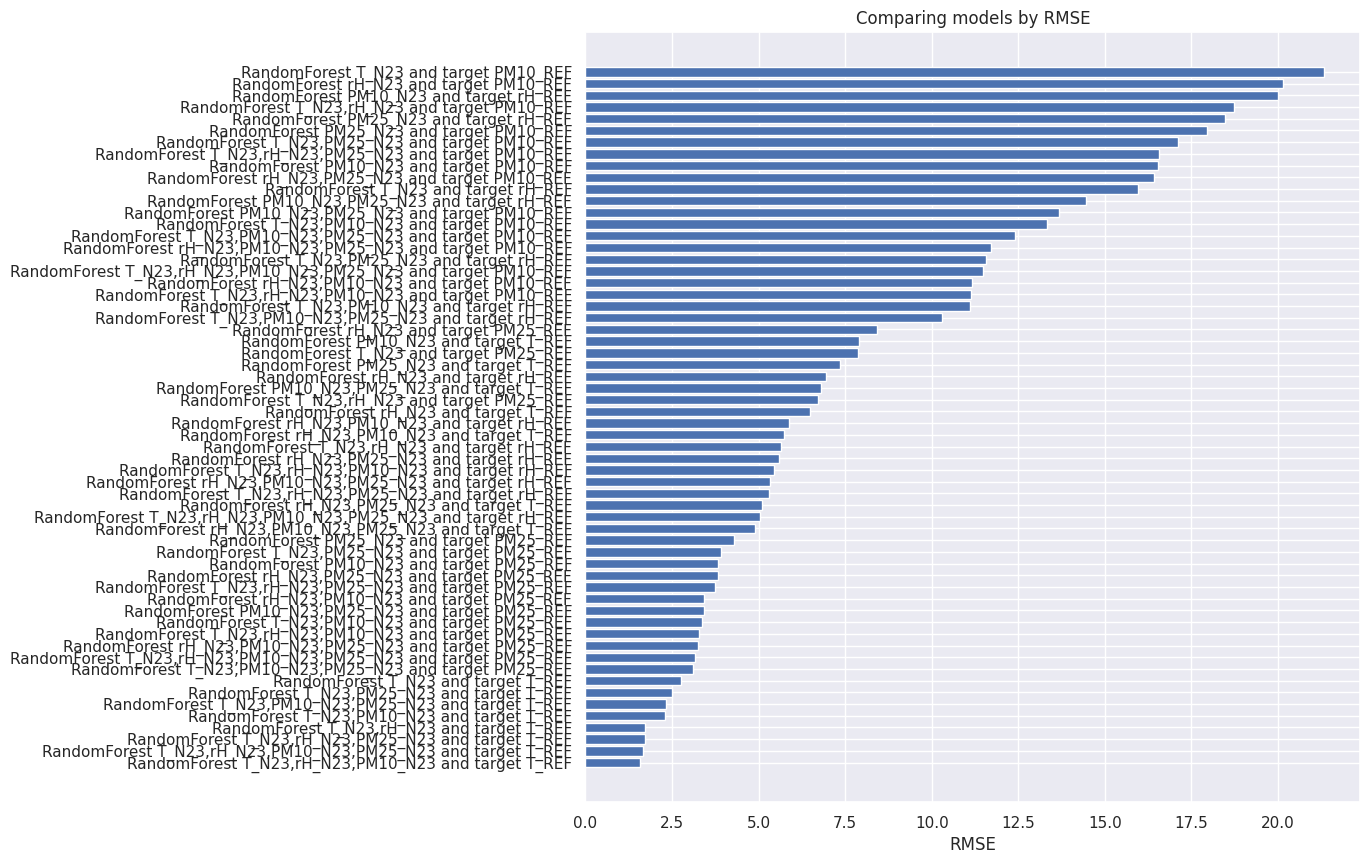

In [31]:
# sort model results by RMSE
sorted_results = sorted(all_results, key=lambda x: x.metrics['RMSE'])

plt.figure(figsize=(10, 10))
plt.title('Comparing models by RMSE')

plt.barh(
    [result.name for result in sorted_results],
    [result.metrics['RMSE'] for result in sorted_results]
)

plt.xlabel('RMSE')
plt.show()

In [32]:
for target in all_targets:
    plt.figure(figsize=(20, 20))
    plt.title('Matching models predictions')

    # actual values graph
    plt.plot(original_by_target[target].values[:100], label='ACTUAL', color='black')

    # models predictions graphs
    for result in model_results[target]:
        plt.plot(result.predictions[:100],
                linestyle='--',
                label=result.name)

    plt.xlabel('Time')
    plt.ylabel(target)

    plt.grid(True)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
all_results = [] # make list in order to save all model results
model_results = {'T_REF':[], 'rH_REF':[], 'PM10_REF':[], 'PM25_REF':[]} # make dict in order to save model results for each target
original_by_target = {} # make dict in order to save correct original values for each target

In [34]:
def TrainTestResultXGB(X, Y, target):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # split the initial dataset into train and test sequences
    original_by_target[target] = Y_test

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dtest = xgb.DMatrix(X_test, label=Y_test)

    param_dist = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 1],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    rsearch = RandomizedSearchCV(
        xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse'),
        param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1
    )

    rsearch.fit(X_train, Y_train)

    num_rounds = 500

    model = xgb.train(
        rsearch.best_params_,
        dtrain,
        num_rounds,
        evals=[(dtrain, 'train'), (dtest, 'test')],
        early_stopping_rounds=20,
        verbose_eval=10
    )

    Y_pred = model.predict(dtest) # make predictions

    result = ModelResult(model, f'XGB {",".join(X.columns.to_list())} and target {target}', Y_pred,
        {'R2': r2_score(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': root_mean_squared_error(Y_test, Y_pred)})

    final_table_by_rmse.append(result) # save model results
    all_results.append(result) # save model results
    model_results[target].append(result) # save model results

**Considering all possible feature combinations**

In [35]:
# initial targets
all_targets = ['T_REF', 'rH_REF', 'PM10_REF', 'PM25_REF']

# initial features
all_features = ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23']

# considering all possible unique feature combinations
for target in all_targets:
    for unique_feature_combination in generate_unique_feature_combinations(all_features):

        print(f'Training model using features: {unique_feature_combination} and target {target}')

        # setting up data
        X = df[unique_feature_combination]
        Y = df[target]

        # training model and saving result
        TrainTestResultXGB(X, Y, target)

Training model using features: ['T_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.40324	test-rmse:6.17032
[10]	train-rmse:5.87618	test-rmse:5.68388
[20]	train-rmse:5.40160	test-rmse:5.24615
[30]	train-rmse:4.97836	test-rmse:4.85380
[40]	train-rmse:4.59763	test-rmse:4.50231
[50]	train-rmse:4.25986	test-rmse:4.19612
[60]	train-rmse:3.95846	test-rmse:3.92377
[70]	train-rmse:3.69024	test-rmse:3.68273
[80]	train-rmse:3.45293	test-rmse:3.47065
[90]	train-rmse:3.24339	test-rmse:3.28644
[100]	train-rmse:3.05740	test-rmse:3.12827
[110]	train-rmse:2.89476	test-rmse:2.99200
[120]	train-rmse:2.75290	test-rmse:2.87431
[130]	train-rmse:2.62920	test-rmse:2.77486
[140]	train-rmse:2.52117	test-rmse:2.68906
[150]	train-rmse:2.42671	test-rmse:2.61768
[160]	train-rmse:2.34505	test-rmse:2.55905
[170]	train-rmse:2.27584	test-rmse:2.50728
[180]	train-rmse:2.21484	test-rmse:2.46815
[190]	train-rmse:2.16259	test-rmse:2.43351
[200]	train-rmse:2.11636	test-rm

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[280]	train-rmse:1.91465	test-rmse:2.31391
[290]	train-rmse:1.90149	test-rmse:2.31620
[299]	train-rmse:1.89136	test-rmse:2.31473
Training model using features: ['rH_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.43378	test-rmse:6.20597
[10]	train-rmse:6.20633	test-rmse:6.05572
[20]	train-rmse:6.00989	test-rmse:5.93080
[30]	train-rmse:5.83363	test-rmse:5.82966
[40]	train-rmse:5.68042	test-rmse:5.75238
[50]	train-rmse:5.54849	test-rmse:5.69252
[60]	train-rmse:5.42986	test-rmse:5.63789
[70]	train-rmse:5.32764	test-rmse:5.59814
[80]	train-rmse:5.23563	test-rmse:5.56280
[90]	train-rmse:5.15757	test-rmse:5.53199
[100]	train-rmse:5.08918	test-rmse:5.50790
[110]	train-rmse:5.02935	test-rmse:5.48686
[120]	train-rmse:4.97490	test-rmse:5.46778
[130]	train-rmse:4.92622	test-rmse:5.45320
[140]	train-rmse:4.88234	test-rmse:5.44325
[150]	train-rmse:4.84463	test-rmse:5.43207
[160]	train-rmse:4.81251	test-rmse:5.41958
[170]	train-rmse:4.78656	test-r

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.43657	test-rmse:6.22110
[10]	train-rmse:6.22984	test-rmse:6.22355
[20]	train-rmse:6.03716	test-rmse:6.23657
[25]	train-rmse:5.95404	test-rmse:6.25117


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.44121	test-rmse:6.21125
[10]	train-rmse:6.27835	test-rmse:6.09911
[20]	train-rmse:6.13607	test-rmse:6.00171
[30]	train-rmse:6.01365	test-rmse:5.92126
[40]	train-rmse:5.90739	test-rmse:5.85748
[50]	train-rmse:5.81395	test-rmse:5.81647
[60]	train-rmse:5.73328	test-rmse:5.78575
[70]	train-rmse:5.66419	test-rmse:5.76172
[80]	train-rmse:5.60549	test-rmse:5.74538
[90]	train-rmse:5.55359	test-rmse:5.73687
[100]	train-rmse:5.50196	test-rmse:5.74214
[109]	train-rmse:5.46604	test-rmse:5.74846


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.40328	test-rmse:6.17013
[10]	train-rmse:5.87305	test-rmse:5.68216
[20]	train-rmse:5.39461	test-rmse:5.23985
[30]	train-rmse:4.96509	test-rmse:4.83908
[40]	train-rmse:4.57536	test-rmse:4.47869
[50]	train-rmse:4.22580	test-rmse:4.15996
[60]	train-rmse:3.91304	test-rmse:3.87370
[70]	train-rmse:3.63181	test-rmse:3.61620
[80]	train-rmse:3.37814	test-rmse:3.38692
[90]	train-rmse:3.15145	test-rmse:3.18483
[100]	train-rmse:2.94620	test-rmse:3.00299
[110]	train-rmse:2.76234	test-rmse:2.84535
[120]	train-rmse:2.60230	test-rmse:2.70632
[130]	train-rmse:2.45777	test-rmse:2.58113
[140]	train-rmse:2.32950	test-rmse:2.47696
[150]	train-rmse:2.21528	test-rmse:2.38604
[160]	train-rmse:2.11360	test-rmse:2.30554
[170]	train-rmse:2.02447	test-rmse:2.23347
[180]	train-rmse:1.94417	test-rmse:2.17071
[190]	train-rmse:1.87461	test-rmse:2.11611
[200]	train-rmse:1.812

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[280]	train-rmse:1.51688	test-rmse:1.86679
[290]	train-rmse:1.49654	test-rmse:1.85422
[300]	train-rmse:1.47779	test-rmse:1.84131
[310]	train-rmse:1.46021	test-rmse:1.82969
[320]	train-rmse:1.44469	test-rmse:1.82032
[330]	train-rmse:1.43061	test-rmse:1.81106
[340]	train-rmse:1.41792	test-rmse:1.80545
[350]	train-rmse:1.40670	test-rmse:1.80185
[360]	train-rmse:1.39566	test-rmse:1.79676
[370]	train-rmse:1.38515	test-rmse:1.79134
[380]	train-rmse:1.37515	test-rmse:1.78700
[390]	train-rmse:1.36558	test-rmse:1.78397
[400]	train-rmse:1.35772	test-rmse:1.78068
[410]	train-rmse:1.35049	test-rmse:1.77978
[420]	train-rmse:1.34313	test-rmse:1.77746
[430]	train-rmse:1.33611	test-rmse:1.77543
[440]	train-rmse:1.32932	test-rmse:1.77321
[450]	train-rmse:1.32204	test-rmse:1.76953
[460]	train-rmse:1.31560	test-rmse:1.76958
[470]	train-rmse:1.30947	test-rmse:1.76854
[480]	train-rmse:1.30228	test-rmse:1.76677
[490]	train-rmse:1.29700	test-rmse:1.76420
[499]	train-rmse:1.29178	test-rmse:1.76382
Training mo

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.89864	test-rmse:5.70004
[10]	train-rmse:2.79935	test-rmse:3.02893
[20]	train-rmse:1.95822	test-rmse:2.53134
[30]	train-rmse:1.74539	test-rmse:2.51898
[40]	train-rmse:1.65502	test-rmse:2.52449
[50]	train-rmse:1.59123	test-rmse:2.55428
[52]	train-rmse:1.58020	test-rmse:2.55566


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM10_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.42160	test-rmse:6.20338
[10]	train-rmse:6.08039	test-rmse:6.03539
[20]	train-rmse:5.78384	test-rmse:5.90437
[30]	train-rmse:5.51825	test-rmse:5.79763
[40]	train-rmse:5.27817	test-rmse:5.71116
[50]	train-rmse:5.07429	test-rmse:5.64044
[60]	train-rmse:4.89576	test-rmse:5.59072
[70]	train-rmse:4.73518	test-rmse:5.55734
[80]	train-rmse:4.58088	test-rmse:5.52884
[90]	train-rmse:4.44848	test-rmse:5.50717
[100]	train-rmse:4.33350	test-rmse:5.48749
[110]	train-rmse:4.22372	test-rmse:5.47596
[120]	train-rmse:4.12581	test-rmse:5.46968
[130]	train-rmse:4.03874	test-rmse:5.47784
[140]	train-rmse:3.94600	test-rmse:5.48930


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.42781	test-rmse:6.20144
[10]	train-rmse:6.14461	test-rmse:5.99991
[20]	train-rmse:5.89712	test-rmse:5.84126
[30]	train-rmse:5.68921	test-rmse:5.71287
[40]	train-rmse:5.50733	test-rmse:5.60789
[50]	train-rmse:5.34815	test-rmse:5.52475
[60]	train-rmse:5.21077	test-rmse:5.45325
[70]	train-rmse:5.08809	test-rmse:5.40108
[80]	train-rmse:4.98790	test-rmse:5.35873
[90]	train-rmse:4.89567	test-rmse:5.32999
[100]	train-rmse:4.81272	test-rmse:5.31037
[110]	train-rmse:4.74185	test-rmse:5.29184
[120]	train-rmse:4.67881	test-rmse:5.28569
[130]	train-rmse:4.62207	test-rmse:5.27749
[140]	train-rmse:4.56916	test-rmse:5.25952
[150]	train-rmse:4.51984	test-rmse:5.25876
[160]	train-rmse:4.47615	test-rmse:5.26204
[167]	train-rmse:4.44547	test-rmse:5.26752


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.42448	test-rmse:6.20903
[10]	train-rmse:6.10812	test-rmse:6.09839
[20]	train-rmse:5.82959	test-rmse:6.02387
[30]	train-rmse:5.58617	test-rmse:5.97079
[40]	train-rmse:5.36407	test-rmse:5.92279
[50]	train-rmse:5.16121	test-rmse:5.89745
[60]	train-rmse:4.97516	test-rmse:5.88698
[70]	train-rmse:4.80070	test-rmse:5.89247


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[80]	train-rmse:4.63940	test-rmse:5.90284
Training model using features: ['T_N23', 'rH_N23', 'PM10_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.86772	test-rmse:5.66809
[10]	train-rmse:2.38943	test-rmse:2.65171
[20]	train-rmse:1.10887	test-rmse:1.92172
[30]	train-rmse:0.62183	test-rmse:1.77637
[40]	train-rmse:0.39916	test-rmse:1.72376
[50]	train-rmse:0.29034	test-rmse:1.71339
[60]	train-rmse:0.22557	test-rmse:1.71164
[70]	train-rmse:0.19247	test-rmse:1.71315
[80]	train-rmse:0.16518	test-rmse:1.71138
[83]	train-rmse:0.16119	test-rmse:1.71207


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.90943	test-rmse:5.70333
[10]	train-rmse:2.91272	test-rmse:3.13333
[20]	train-rmse:1.96208	test-rmse:2.46186
[30]	train-rmse:1.59622	test-rmse:2.24846
[40]	train-rmse:1.39411	test-rmse:2.11499
[50]	train-rmse:1.25193	test-rmse:1.99431
[60]	train-rmse:1.17065	test-rmse:1.97787
[70]	train-rmse:1.10159	test-rmse:1.97170
[80]	train-rmse:1.04698	test-rmse:1.96411
[90]	train-rmse:1.00265	test-rmse:1.95466
[100]	train-rmse:0.96619	test-rmse:1.96410
[107]	train-rmse:0.94354	test-rmse:1.95499


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.40324	test-rmse:6.17032
[10]	train-rmse:5.87587	test-rmse:5.68510
[20]	train-rmse:5.40080	test-rmse:5.25113
[30]	train-rmse:4.97687	test-rmse:4.86032
[40]	train-rmse:4.59466	test-rmse:4.51099
[50]	train-rmse:4.25490	test-rmse:4.20699
[60]	train-rmse:3.95195	test-rmse:3.93971
[70]	train-rmse:3.68112	test-rmse:3.70833
[80]	train-rmse:3.44087	test-rmse:3.50238
[90]	train-rmse:3.22648	test-rmse:3.32478
[100]	train-rmse:3.03558	test-rmse:3.17613
[110]	train-rmse:2.86659	test-rmse:3.05081
[120]	train-rmse:2.71866	test-rmse:2.93733
[130]	train-rmse:2.58766	test-rmse:2.84498
[140]	train-rmse:2.47194	test-rmse:2.76816
[150]	train-rmse:2.36909	test-rmse:2.70713
[160]	train-rmse:2.28075	test-rmse:2.65186
[170]	train-rmse:2.20424	test-rmse:2.60804
[180]	train-rmse:2.13605	test-rmse:2.56850
[190]	train-rmse:2.07798	test-rmse:2.53802
[200]	tr

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[260]	train-rmse:1.81126	test-rmse:2.45434
[270]	train-rmse:1.78779	test-rmse:2.44349
[280]	train-rmse:1.76550	test-rmse:2.43853
[290]	train-rmse:1.74361	test-rmse:2.43408
[300]	train-rmse:1.72684	test-rmse:2.43179
[310]	train-rmse:1.71026	test-rmse:2.42858
[320]	train-rmse:1.69413	test-rmse:2.42242
[330]	train-rmse:1.67835	test-rmse:2.42383
[340]	train-rmse:1.66246	test-rmse:2.42446
[350]	train-rmse:1.64873	test-rmse:2.42458
[356]	train-rmse:1.64107	test-rmse:2.42298
Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:6.42711	test-rmse:6.20238
[10]	train-rmse:6.12586	test-rmse:5.98806
[20]	train-rmse:5.85956	test-rmse:5.82244
[30]	train-rmse:5.63542	test-rmse:5.69067
[40]	train-rmse:5.43919	test-rmse:5.57067
[50]	train-rmse:5.26606	test-rmse:5.47475
[60]	train-rmse:5.11252	test-rmse:5.38980
[70]	train-rmse:4.97654	test-rmse:5.33324
[80]	train-rmse:4.85633	test-rmse:5.29329
[90]	t

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[220]	train-rmse:3.96302	test-rmse:5.11446
Training model using features: ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23'] and target T_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.89799	test-rmse:5.68805
[10]	train-rmse:2.68580	test-rmse:2.85542
[20]	train-rmse:1.69127	test-rmse:2.14784
[30]	train-rmse:1.36385	test-rmse:1.97039
[40]	train-rmse:1.22619	test-rmse:1.94291
[50]	train-rmse:1.15411	test-rmse:1.93048
[60]	train-rmse:1.09101	test-rmse:1.90151
[70]	train-rmse:1.03262	test-rmse:1.89030
[80]	train-rmse:0.98263	test-rmse:1.87810
[90]	train-rmse:0.93876	test-rmse:1.87149
[100]	train-rmse:0.89361	test-rmse:1.87208
[110]	train-rmse:0.86135	test-rmse:1.87087
[120]	train-rmse:0.82705	test-rmse:1.86772
[130]	train-rmse:0.79791	test-rmse:1.86052
[140]	train-rmse:0.76717	test-rmse:1.85745
[150]	train-rmse:0.73529	test-rmse:1.85162
[160]	train-rmse:0.71083	test-rmse:1.84769
[170]	train-rmse:0.69563	test-rmse:1.85025
[174]	train-rmse:0.68424	test-rmse:1.8552

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:14.96710	test-rmse:15.08310
[10]	train-rmse:11.24504	test-rmse:12.31428
[20]	train-rmse:10.30793	test-rmse:11.87762
[30]	train-rmse:9.86370	test-rmse:12.01638
[37]	train-rmse:9.74092	test-rmse:12.05871


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.61991	test-rmse:15.64070
[10]	train-rmse:14.34432	test-rmse:14.39350
[20]	train-rmse:13.20214	test-rmse:13.28116
[30]	train-rmse:12.17928	test-rmse:12.28180
[40]	train-rmse:11.26421	test-rmse:11.38127
[50]	train-rmse:10.44431	test-rmse:10.59293
[60]	train-rmse:9.70815	test-rmse:9.92395
[70]	train-rmse:9.05705	test-rmse:9.32517
[80]	train-rmse:8.48051	test-rmse:8.80746
[90]	train-rmse:7.96761	test-rmse:8.35786
[100]	train-rmse:7.50638	test-rmse:7.96852
[110]	train-rmse:7.09921	test-rmse:7.64132
[120]	train-rmse:6.73819	test-rmse:7.36377
[130]	train-rmse:6.41876	test-rmse:7.12986


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[140]	train-rmse:6.13808	test-rmse:6.92157
[150]	train-rmse:5.89020	test-rmse:6.76322
[160]	train-rmse:5.67360	test-rmse:6.63802
[170]	train-rmse:5.48433	test-rmse:6.53214
[180]	train-rmse:5.31922	test-rmse:6.44778
[190]	train-rmse:5.17655	test-rmse:6.38642
[200]	train-rmse:5.05202	test-rmse:6.32595
[210]	train-rmse:4.94415	test-rmse:6.27473
[220]	train-rmse:4.84915	test-rmse:6.23563
[230]	train-rmse:4.76733	test-rmse:6.19747
[240]	train-rmse:4.69354	test-rmse:6.17256
[250]	train-rmse:4.62671	test-rmse:6.15660
[260]	train-rmse:4.56661	test-rmse:6.13855
[270]	train-rmse:4.51173	test-rmse:6.13449
[280]	train-rmse:4.46328	test-rmse:6.13891
[284]	train-rmse:4.44584	test-rmse:6.14248
Training model using features: ['PM10_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.71565	test-rmse:15.76178
[10]	train-rmse:15.38348	test-rmse:15.72833
[20]	train-rmse:15.08885	test-rmse:15.73023
[30]	train-rmse:14.83072	test-rmse:15.73708
[33]	train-rms

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.70027	test-rmse:15.74586
[10]	train-rmse:15.20161	test-rmse:15.54464
[20]	train-rmse:14.75073	test-rmse:15.39634
[30]	train-rmse:14.35612	test-rmse:15.28025
[40]	train-rmse:14.01320	test-rmse:15.21804
[50]	train-rmse:13.69151	test-rmse:15.17530
[60]	train-rmse:13.41171	test-rmse:15.14466
[70]	train-rmse:13.13651	test-rmse:15.14848
[80]	train-rmse:12.90471	test-rmse:15.16719
[85]	train-rmse:12.80881	test-rmse:15.18549


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:14.41957	test-rmse:14.45342
[10]	train-rmse:7.21402	test-rmse:7.45381
[20]	train-rmse:5.37830	test-rmse:5.82215
[30]	train-rmse:4.87048	test-rmse:5.48053
[40]	train-rmse:4.59346	test-rmse:5.43047
[50]	train-rmse:4.34192	test-rmse:5.42671
[60]	train-rmse:4.20610	test-rmse:5.43880
[70]	train-rmse:4.08242	test-rmse:5.44063


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:51:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.66640	test-rmse:15.69443
[10]	train-rmse:14.81740	test-rmse:14.95281
[20]	train-rmse:14.06495	test-rmse:14.30848
[30]	train-rmse:13.41406	test-rmse:13.75643
[40]	train-rmse:12.84153	test-rmse:13.28805
[50]	train-rmse:12.34851	test-rmse:12.90196
[60]	train-rmse:11.92361	test-rmse:12.58982
[70]	train-rmse:11.54657	test-rmse:12.32332
[80]	train-rmse:11.21340	test-rmse:12.07669
[90]	train-rmse:10.92691	test-rmse:11.87716
[100]	train-rmse:10.67892	test-rmse:11.70556
[110]	train-rmse:10.46230	test-rmse:11.55729
[120]	train-rmse:10.26882	test-rmse:11.43258
[130]	train-rmse:10.07383	test-rmse:11.33453
[140]	train-rmse:9.89743	test-rmse:11.24607
[150]	train-rmse:9.74264	test-rmse:11.16839
[160]	train-rmse:9.60294	test-rmse:11.10891
[170]	train-rmse:9.48092	test-rmse:11.05648
[180]	train-rmse:9.35426	test-rmse:11.00388
[190]	train-rmse:9.24464	test

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[280]	train-rmse:8.65614	test-rmse:10.79183
[290]	train-rmse:8.61308	test-rmse:10.77847
[300]	train-rmse:8.57649	test-rmse:10.76515
[310]	train-rmse:8.53659	test-rmse:10.75391
[320]	train-rmse:8.50080	test-rmse:10.74442
[330]	train-rmse:8.46661	test-rmse:10.73735
[340]	train-rmse:8.43182	test-rmse:10.73241
[350]	train-rmse:8.40606	test-rmse:10.73405
[360]	train-rmse:8.38552	test-rmse:10.73138
[370]	train-rmse:8.36379	test-rmse:10.73322
[376]	train-rmse:8.34793	test-rmse:10.73225
Training model using features: ['T_N23', 'PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.64865	test-rmse:15.69304
[10]	train-rmse:14.66611	test-rmse:14.96858
[20]	train-rmse:13.79620	test-rmse:14.37199
[30]	train-rmse:12.98238	test-rmse:13.82914
[40]	train-rmse:12.24094	test-rmse:13.37048
[50]	train-rmse:11.55995	test-rmse:12.97235
[60]	train-rmse:10.94404	test-rmse:12.61736
[70]	train-rmse:10.38909	test-rmse:12.28600
[80]	train-rmse:9.89829	test-rmse

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[150]	train-rmse:7.57151	test-rmse:11.27373
[160]	train-rmse:7.33173	test-rmse:11.24451
[170]	train-rmse:7.12331	test-rmse:11.22126
[180]	train-rmse:6.93273	test-rmse:11.22598
[190]	train-rmse:6.75676	test-rmse:11.20722
[200]	train-rmse:6.58327	test-rmse:11.16030
[210]	train-rmse:6.42946	test-rmse:11.13198
[220]	train-rmse:6.26848	test-rmse:11.09766
[230]	train-rmse:6.10546	test-rmse:11.07000
[240]	train-rmse:5.97463	test-rmse:11.04663
[250]	train-rmse:5.85182	test-rmse:11.02724
[260]	train-rmse:5.66712	test-rmse:11.00231
[270]	train-rmse:5.49032	test-rmse:10.97559
[280]	train-rmse:5.34082	test-rmse:10.96217
[290]	train-rmse:5.21326	test-rmse:10.94876
[300]	train-rmse:5.09756	test-rmse:10.93861
[310]	train-rmse:4.99407	test-rmse:10.92743
[320]	train-rmse:4.89184	test-rmse:10.92104
[330]	train-rmse:4.79831	test-rmse:10.92264
[340]	train-rmse:4.70706	test-rmse:10.92382
[350]	train-rmse:4.60560	test-rmse:10.91189
[360]	train-rmse:4.51290	test-rmse:10.91235
[370]	train-rmse:4.42662	test-rm

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[170]	train-rmse:5.14130	test-rmse:6.34050
[180]	train-rmse:4.94963	test-rmse:6.22443
[190]	train-rmse:4.77348	test-rmse:6.12303
[200]	train-rmse:4.61076	test-rmse:6.03584
[210]	train-rmse:4.47329	test-rmse:5.96677
[220]	train-rmse:4.34966	test-rmse:5.90145
[230]	train-rmse:4.23370	test-rmse:5.86181
[240]	train-rmse:4.13323	test-rmse:5.82737
[250]	train-rmse:4.03660	test-rmse:5.79890
[260]	train-rmse:3.95294	test-rmse:5.77278
[270]	train-rmse:3.87895	test-rmse:5.74943
[280]	train-rmse:3.81058	test-rmse:5.73186
[290]	train-rmse:3.74525	test-rmse:5.71060
[300]	train-rmse:3.68805	test-rmse:5.70288
[310]	train-rmse:3.63776	test-rmse:5.69310
[320]	train-rmse:3.58861	test-rmse:5.69105
[330]	train-rmse:3.54524	test-rmse:5.69732
[334]	train-rmse:3.52138	test-rmse:5.69534
Training model using features: ['rH_N23', 'PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:14.41957	test-rmse:14.45342
[10]	train-rmse:7.20255	test-rmse:7.43709
[20]	tra

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23', 'PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.33716	test-rmse:15.58091
[10]	train-rmse:13.10825	test-rmse:14.76959
[20]	train-rmse:11.70864	test-rmse:14.09732
[30]	train-rmse:10.81341	test-rmse:13.59039
[40]	train-rmse:10.22148	test-rmse:13.45523
[50]	train-rmse:9.77507	test-rmse:13.47998
[59]	train-rmse:9.48362	test-rmse:13.50839


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM10_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:15.62191	test-rmse:15.64362
[10]	train-rmse:14.47551	test-rmse:14.54439
[20]	train-rmse:13.44063	test-rmse:13.56314
[30]	train-rmse:12.44363	test-rmse:12.59236
[40]	train-rmse:11.56863	test-rmse:11.74790
[50]	train-rmse:10.83432	test-rmse:11.05254
[60]	train-rmse:10.17714	test-rmse:10.42877
[70]	train-rmse:9.56886	test-rmse:9.83933
[80]	train-rmse:8.99199	test-rmse:9.29357
[90]	train-rmse:8.54109	test-rmse:8.88466
[100]	train-rmse:8.09745	test-rmse:8.47155
[110]	train-rmse:7.70550	test-rmse:8.10615
[120]	train-rmse:7.35186	test-rmse:7.77393
[130]	train-rmse:6.99863	test-rmse:7.41798
[140]	train-rmse:6.72204	test-rmse:7.15780
[150]	train-rmse:6.50195	test-rmse:6.96501
[160]	train-rmse:6.31724	test-rmse:6.80615
[170]	train-rmse:6.11519	test-rmse:6.61129
[180]	train-rmse:5.93476	test-rmse:6.43737
[190]	train-rmse:5.79059	test-rmse:6.3

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[230]	train-rmse:5.32417	test-rmse:5.90929
[240]	train-rmse:5.23744	test-rmse:5.82940
[250]	train-rmse:5.15078	test-rmse:5.75758
[260]	train-rmse:5.07782	test-rmse:5.69418
[270]	train-rmse:5.02041	test-rmse:5.65100
[280]	train-rmse:4.95747	test-rmse:5.60060
[290]	train-rmse:4.90705	test-rmse:5.56462
[300]	train-rmse:4.85236	test-rmse:5.52783
[310]	train-rmse:4.80856	test-rmse:5.49777
[320]	train-rmse:4.76296	test-rmse:5.46724
[330]	train-rmse:4.72813	test-rmse:5.44510
[340]	train-rmse:4.68829	test-rmse:5.41338
[350]	train-rmse:4.65016	test-rmse:5.38709
[360]	train-rmse:4.61654	test-rmse:5.36625
[370]	train-rmse:4.58860	test-rmse:5.35233
[380]	train-rmse:4.55450	test-rmse:5.33793
[390]	train-rmse:4.52293	test-rmse:5.32563
[400]	train-rmse:4.49578	test-rmse:5.30573
[410]	train-rmse:4.46935	test-rmse:5.29740
[420]	train-rmse:4.44575	test-rmse:5.28785
[430]	train-rmse:4.42212	test-rmse:5.28316
[440]	train-rmse:4.39819	test-rmse:5.26515
[450]	train-rmse:4.37691	test-rmse:5.25523
[460]	train

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[250]	train-rmse:5.03078	test-rmse:5.60036
[260]	train-rmse:4.97374	test-rmse:5.56257
[270]	train-rmse:4.92328	test-rmse:5.52583
[280]	train-rmse:4.87571	test-rmse:5.49331
[290]	train-rmse:4.82859	test-rmse:5.46769
[300]	train-rmse:4.78472	test-rmse:5.45186
[310]	train-rmse:4.74167	test-rmse:5.44294
[320]	train-rmse:4.70238	test-rmse:5.43966
[330]	train-rmse:4.66007	test-rmse:5.43250
[340]	train-rmse:4.62067	test-rmse:5.42256
[350]	train-rmse:4.58565	test-rmse:5.41526
[360]	train-rmse:4.55203	test-rmse:5.40595
[370]	train-rmse:4.52204	test-rmse:5.39918
[380]	train-rmse:4.48980	test-rmse:5.39507
[390]	train-rmse:4.45908	test-rmse:5.39052
[400]	train-rmse:4.42973	test-rmse:5.38559
[410]	train-rmse:4.40290	test-rmse:5.38322
[420]	train-rmse:4.37891	test-rmse:5.38332
[430]	train-rmse:4.35401	test-rmse:5.38066
[440]	train-rmse:4.33381	test-rmse:5.37725
[450]	train-rmse:4.31567	test-rmse:5.37338
[460]	train-rmse:4.29880	test-rmse:5.37120
[470]	train-rmse:4.28082	test-rmse:5.36763
[480]	train

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[120]	train-rmse:7.61997	test-rmse:10.98560
[130]	train-rmse:7.25619	test-rmse:10.85821
[140]	train-rmse:6.93164	test-rmse:10.75584
[150]	train-rmse:6.62507	test-rmse:10.70401
[160]	train-rmse:6.34660	test-rmse:10.60926
[170]	train-rmse:6.09533	test-rmse:10.52731
[180]	train-rmse:5.87095	test-rmse:10.48496
[190]	train-rmse:5.66441	test-rmse:10.43987
[200]	train-rmse:5.46648	test-rmse:10.41078
[210]	train-rmse:5.29831	test-rmse:10.36638
[220]	train-rmse:5.11388	test-rmse:10.34455
[230]	train-rmse:4.95829	test-rmse:10.31867
[240]	train-rmse:4.79991	test-rmse:10.28946
[250]	train-rmse:4.63755	test-rmse:10.27583
[260]	train-rmse:4.49229	test-rmse:10.25476
[270]	train-rmse:4.36185	test-rmse:10.25680
[280]	train-rmse:4.24036	test-rmse:10.24133
[290]	train-rmse:4.12081	test-rmse:10.24951
[300]	train-rmse:4.01186	test-rmse:10.24640
Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:14.4

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23'] and target rH_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:14.41697	test-rmse:14.45195
[10]	train-rmse:7.61140	test-rmse:8.14397
[20]	train-rmse:5.51351	test-rmse:6.30380
[30]	train-rmse:4.67216	test-rmse:5.72644
[40]	train-rmse:4.25304	test-rmse:5.39440
[50]	train-rmse:4.02299	test-rmse:5.28579
[60]	train-rmse:3.80917	test-rmse:5.22249
[70]	train-rmse:3.64016	test-rmse:5.16656
[80]	train-rmse:3.49084	test-rmse:5.10159
[90]	train-rmse:3.36684	test-rmse:5.08197
[100]	train-rmse:3.23679	test-rmse:5.07304
[110]	train-rmse:3.10462	test-rmse:5.07065


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[120]	train-rmse:2.96856	test-rmse:5.01228
[130]	train-rmse:2.85526	test-rmse:4.99732
[140]	train-rmse:2.73995	test-rmse:4.97735
[150]	train-rmse:2.68097	test-rmse:4.96987
[160]	train-rmse:2.59128	test-rmse:4.94088
[170]	train-rmse:2.49171	test-rmse:4.93450
[180]	train-rmse:2.40899	test-rmse:4.92757
[190]	train-rmse:2.33312	test-rmse:4.90666
[200]	train-rmse:2.24522	test-rmse:4.88161
[210]	train-rmse:2.17126	test-rmse:4.87716
[220]	train-rmse:2.09051	test-rmse:4.86809
[230]	train-rmse:2.03668	test-rmse:4.87020
[238]	train-rmse:1.99897	test-rmse:4.87442
Training model using features: ['T_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.37759	test-rmse:18.26679
[10]	train-rmse:12.94915	test-rmse:18.36280
[19]	train-rmse:12.60109	test-rmse:18.46929


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.36906	test-rmse:18.26341
[10]	train-rmse:12.93225	test-rmse:18.28871
[20]	train-rmse:12.56235	test-rmse:18.30852


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:52:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.36557	test-rmse:18.22132
[10]	train-rmse:12.85471	test-rmse:17.83845
[20]	train-rmse:12.40710	test-rmse:17.47536
[30]	train-rmse:12.00086	test-rmse:17.17558
[40]	train-rmse:11.65284	test-rmse:16.89899
[50]	train-rmse:11.34889	test-rmse:16.67189
[60]	train-rmse:11.08966	test-rmse:16.49612
[70]	train-rmse:10.86703	test-rmse:16.31498
[80]	train-rmse:10.67297	test-rmse:16.19755
[90]	train-rmse:10.49880	test-rmse:16.06917
[100]	train-rmse:10.34922	test-rmse:15.93370
[110]	train-rmse:10.22482	test-rmse:15.82079
[120]	train-rmse:10.10587	test-rmse:15.71683
[130]	train-rmse:10.00143	test-rmse:15.65250
[140]	train-rmse:9.91571	test-rmse:15.59384
[150]	train-rmse:9.82327	test-rmse:15.52096
[160]	train-rmse:9.75022	test-rmse:15.47842
[170]	train-rmse:9.67170	test-rmse:15.44132
[180]	train-rmse:9.59720	test-rmse:15.39493
[190]	train-rmse:9.52494	test-rmse:1

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.39259	test-rmse:18.24081
[10]	train-rmse:13.11922	test-rmse:18.05342
[20]	train-rmse:12.89090	test-rmse:17.86185
[30]	train-rmse:12.69605	test-rmse:17.70210
[40]	train-rmse:12.53164	test-rmse:17.55549
[50]	train-rmse:12.38779	test-rmse:17.43893
[60]	train-rmse:12.26566	test-rmse:17.33285
[70]	train-rmse:12.15653	test-rmse:17.24184
[80]	train-rmse:12.05744	test-rmse:17.15571
[90]	train-rmse:11.97125	test-rmse:17.08123
[100]	train-rmse:11.88502	test-rmse:17.01089
[110]	train-rmse:11.80530	test-rmse:16.95227
[120]	train-rmse:11.73435	test-rmse:16.89828
[130]	train-rmse:11.66492	test-rmse:16.85623
[140]	train-rmse:11.60809	test-rmse:16.82021
[150]	train-rmse:11.54274	test-rmse:16.78690
[160]	train-rmse:11.48791	test-rmse:16.74803
[170]	train-rmse:11.43684	test-rmse:16.71542
[180]	train-rmse:11.36530	test-rmse:16.70015
[190]	train-rmse:11.29787	test-

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.01118	test-rmse:18.19024
[10]	train-rmse:10.42749	test-rmse:18.31219
[20]	train-rmse:8.85657	test-rmse:18.56749
[26]	train-rmse:8.12007	test-rmse:18.59841


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.32415	test-rmse:18.15298
[10]	train-rmse:12.39589	test-rmse:17.14474
[20]	train-rmse:11.54094	test-rmse:16.32517
[30]	train-rmse:10.75462	test-rmse:15.67580


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[40]	train-rmse:10.04702	test-rmse:15.12972
[50]	train-rmse:9.40155	test-rmse:14.68469
[60]	train-rmse:8.81326	test-rmse:14.33865
[70]	train-rmse:8.28328	test-rmse:14.06824
[80]	train-rmse:7.80655	test-rmse:13.87887
[90]	train-rmse:7.36219	test-rmse:13.74467
[100]	train-rmse:6.95185	test-rmse:13.65030
[110]	train-rmse:6.57071	test-rmse:13.61039
[120]	train-rmse:6.21899	test-rmse:13.60628
[130]	train-rmse:5.90334	test-rmse:13.58311
[140]	train-rmse:5.61526	test-rmse:13.58412
[150]	train-rmse:5.36451	test-rmse:13.56389
[160]	train-rmse:5.13729	test-rmse:13.54939
[170]	train-rmse:4.92425	test-rmse:13.54095
[180]	train-rmse:4.71306	test-rmse:13.56094
[190]	train-rmse:4.51692	test-rmse:13.58209
Training model using features: ['T_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.34514	test-rmse:18.22236
[10]	train-rmse:12.62181	test-rmse:17.92422
[20]	train-rmse:11.96257	test-rmse:17.64311
[30]	train-rmse:11.33346	test-rmse:1

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM10_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:12.70398	test-rmse:17.04509
[10]	train-rmse:8.74558	test-rmse:12.21649
[20]	train-rmse:7.47214	test-rmse:11.42913
[30]	train-rmse:6.84482	test-rmse:10.73998
[40]	train-rmse:6.40606	test-rmse:10.51463
[50]	train-rmse:6.03269	test-rmse:10.32923
[60]	train-rmse:5.69253	test-rmse:10.33504
[70]	train-rmse:5.42966	test-rmse:10.30590
[75]	train-rmse:5.31944	test-rmse:10.28773


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.35594	test-rmse:18.23256
[10]	train-rmse:12.69588	test-rmse:17.89898
[20]	train-rmse:12.08776	test-rmse:17.58329
[30]	train-rmse:11.53984	test-rmse:17.32719
[40]	train-rmse:11.05199	test-rmse:17.13059
[50]	train-rmse:10.59734	test-rmse:16.98484
[60]	train-rmse:10.20057	test-rmse:16.84092
[70]	train-rmse:9.82731	test-rmse:16.71582
[80]	train-rmse:9.48023	test-rmse:16.62496
[90]	train-rmse:9.17101	test-rmse:16.55744
[100]	train-rmse:8.90303	test-rmse:16.51941
[110]	train-rmse:8.65472	test-rmse:16.48276
[120]	train-rmse:8.42532	test-rmse:16.45528
[130]	train-rmse:8.21469	test-rmse:16.43601
[140]	train-rmse:8.01913	test-rmse:16.41795
[150]	train-rmse:7.86087	test-rmse:16.42126
[160]	train-rmse:7.70763	test-rmse:16.40844
[170]	train-rmse:7.53720	test-rmse:16.41614
[173]	train-rmse:7.49031	test-rmse:16.41168


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:13.33708	test-rmse:18.19989
[10]	train-rmse:12.53552	test-rmse:17.66137
[20]	train-rmse:11.80649	test-rmse:17.15411
[30]	train-rmse:11.11731	test-rmse:16.74099
[40]	train-rmse:10.50006	test-rmse:16.38184
[50]	train-rmse:9.92172	test-rmse:16.07864
[60]	train-rmse:9.41545	test-rmse:15.80205
[70]	train-rmse:8.94272	test-rmse:15.48776
[80]	train-rmse:8.52710	test-rmse:15.29802
[90]	train-rmse:8.13388	test-rmse:15.11595
[100]	train-rmse:7.77660	test-rmse:14.94985
[110]	train-rmse:7.45681	test-rmse:14.77836
[120]	train-rmse:7.16188	test-rmse:14.62676
[130]	train-rmse:6.88821	test-rmse:14.53601
[140]	train-rmse:6.63333	test-rmse:14.45020
[150]	train-rmse:6.39806	test-rmse:14.33334
[160]	train-rmse:6.19460	test-rmse:14.28037
[170]	train-rmse:5.99395	test-rmse:14.18635
[180]	train-rmse:5.80485	test-rmse:14.08016
[190]	train-rmse:5.64826	test-rms

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[200]	train-rmse:5.48827	test-rmse:13.92194
[210]	train-rmse:5.35367	test-rmse:13.89429
[220]	train-rmse:5.21268	test-rmse:13.83714
[230]	train-rmse:5.09064	test-rmse:13.78370
[240]	train-rmse:4.96375	test-rmse:13.72068
[250]	train-rmse:4.84924	test-rmse:13.67356
[260]	train-rmse:4.74961	test-rmse:13.63247
[270]	train-rmse:4.64842	test-rmse:13.60608
[280]	train-rmse:4.55556	test-rmse:13.58150
[290]	train-rmse:4.47365	test-rmse:13.55966
[300]	train-rmse:4.39896	test-rmse:13.54325
[310]	train-rmse:4.32612	test-rmse:13.52100
[320]	train-rmse:4.25620	test-rmse:13.49858
[330]	train-rmse:4.18932	test-rmse:13.47448
[340]	train-rmse:4.12087	test-rmse:13.46360
[350]	train-rmse:4.06584	test-rmse:13.45688
[360]	train-rmse:4.00430	test-rmse:13.43328
[370]	train-rmse:3.95763	test-rmse:13.42745
[380]	train-rmse:3.90680	test-rmse:13.40850
[390]	train-rmse:3.85820	test-rmse:13.38269
[400]	train-rmse:3.81437	test-rmse:13.37039
[410]	train-rmse:3.76591	test-rmse:13.35133
[420]	train-rmse:3.72057	test-rm

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:12.60035	test-rmse:17.87904
[10]	train-rmse:7.48647	test-rmse:16.43425
[20]	train-rmse:5.11501	test-rmse:16.46535
[30]	train-rmse:3.70683	test-rmse:16.51750
[31]	train-rmse:3.58826	test-rmse:16.47607


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:12.65609	test-rmse:17.33105
[10]	train-rmse:8.15925	test-rmse:13.48737
[20]	train-rmse:6.40698	test-rmse:12.99338
[30]	train-rmse:5.55319	test-rmse:12.81886
[40]	train-rmse:5.02973	test-rmse:12.71229
[50]	train-rmse:4.58367	test-rmse:12.58891
[60]	train-rmse:4.27205	test-rmse:12.73020
[70]	train-rmse:4.04604	test-rmse:12.64836
[80]	train-rmse:3.83646	test-rmse:12.67806
[84]	train-rmse:3.78588	test-rmse:12.68961


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:12.70398	test-rmse:17.04509
[10]	train-rmse:8.91697	test-rmse:12.92363
[20]	train-rmse:7.28485	test-rmse:11.77222
[30]	train-rmse:6.21698	test-rmse:11.28064
[40]	train-rmse:5.68965	test-rmse:11.05052
[50]	train-rmse:5.27799	test-rmse:11.09119
[60]	train-rmse:4.96307	test-rmse:10.80531
[70]	train-rmse:4.65233	test-rmse:10.81734
[80]	train-rmse:4.36878	test-rmse:10.83782
[82]	train-rmse:4.34747	test-rmse:10.85963


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:53:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23'] and target PM10_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:12.52632	test-rmse:16.96421
[10]	train-rmse:6.99373	test-rmse:11.72955
[20]	train-rmse:4.60741	test-rmse:10.93063
[30]	train-rmse:3.53974	test-rmse:10.44482
[40]	train-rmse:2.91161	test-rmse:10.08544
[50]	train-rmse:2.36000	test-rmse:10.02171
[60]	train-rmse:2.07598	test-rmse:9.95406
[70]	train-rmse:1.79992	test-rmse:9.89872
[80]	train-rmse:1.56932	test-rmse:9.88621
[90]	train-rmse:1.37440	test-rmse:9.84662
[100]	train-rmse:1.21944	test-rmse:9.85776
[110]	train-rmse:1.07302	test-rmse:9.84127
[120]	train-rmse:0.97253	test-rmse:9.83263
[130]	train-rmse:0.87646	test-rmse:9.81325
[140]	train-rmse:0.79482	test-rmse:9.80769
[150]	train-rmse:0.72236	test-rmse:9.78371
[160]	train-rmse:0.65782	test-rmse:9.78452


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[170]	train-rmse:0.58580	test-rmse:9.79338
[173]	train-rmse:0.56867	test-rmse:9.79649
Training model using features: ['T_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.84945	test-rmse:6.80104
[10]	train-rmse:5.67534	test-rmse:6.77516
[20]	train-rmse:5.52504	test-rmse:6.76751
[30]	train-rmse:5.39749	test-rmse:6.77420
[39]	train-rmse:5.29555	test-rmse:6.79225


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.85612	test-rmse:6.80896
[10]	train-rmse:5.76410	test-rmse:6.84170
[20]	train-rmse:5.68110	test-rmse:6.87438


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM10_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.42818	test-rmse:6.37710
[10]	train-rmse:3.09970	test-rmse:4.05832
[20]	train-rmse:2.50580	test-rmse:3.53355
[30]	train-rmse:2.29375	test-rmse:3.41192
[40]	train-rmse:2.20050	test-rmse:3.38932
[50]	train-rmse:2.14764	test-rmse:3.40372
[60]	train-rmse:2.11629	test-rmse:3.41319
[65]	train-rmse:2.09871	test-rmse:3.40717


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.82873	test-rmse:6.76773
[10]	train-rmse:5.45855	test-rmse:6.42125
[20]	train-rmse:5.13199	test-rmse:6.11595
[30]	train-rmse:4.84513	test-rmse:5.84871
[40]	train-rmse:4.59414	test-rmse:5.61596
[50]	train-rmse:4.37487	test-rmse:5.41218
[60]	train-rmse:4.18413	test-rmse:5.23351
[70]	train-rmse:4.01874	test-rmse:5.07400
[80]	train-rmse:3.87552	test-rmse:4.93361
[90]	train-rmse:3.75163	test-rmse:4.81511
[100]	train-rmse:3.64480	test-rmse:4.70864
[110]	train-rmse:3.55015	test-rmse:4.61958
[120]	train-rmse:3.46797	test-rmse:4.54596
[130]	train-rmse:3.39735	test-rmse:4.47722
[140]	train-rmse:3.33592	test-rmse:4.40996
[150]	train-rmse:3.28229	test-rmse:4.35707
[160]	train-rmse:3.23455	test-rmse:4.30923
[170]	train-rmse:3.19219	test-rmse:4.27180
[180]	train-rmse:3.15262	test-rmse:4.24367
[190]	train-rmse:3.11588	test-rmse:4.22088
[200]	train-rmse:3.08330	t

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[260]	train-rmse:2.93688	test-rmse:4.10586
[270]	train-rmse:2.91943	test-rmse:4.09475
[280]	train-rmse:2.90256	test-rmse:4.08542
[290]	train-rmse:2.88744	test-rmse:4.07962
[300]	train-rmse:2.87102	test-rmse:4.07512
[310]	train-rmse:2.85611	test-rmse:4.07376
[320]	train-rmse:2.84185	test-rmse:4.07075
[330]	train-rmse:2.82751	test-rmse:4.06976
[340]	train-rmse:2.81162	test-rmse:4.06188
[350]	train-rmse:2.79411	test-rmse:4.05556
[360]	train-rmse:2.77945	test-rmse:4.05299
[370]	train-rmse:2.76520	test-rmse:4.04790
[380]	train-rmse:2.75242	test-rmse:4.04483
[390]	train-rmse:2.74141	test-rmse:4.04121
[400]	train-rmse:2.73054	test-rmse:4.03916
[410]	train-rmse:2.71918	test-rmse:4.03648
[420]	train-rmse:2.70907	test-rmse:4.03487
[430]	train-rmse:2.69943	test-rmse:4.03300
[440]	train-rmse:2.69051	test-rmse:4.02959
[450]	train-rmse:2.68117	test-rmse:4.02763
[460]	train-rmse:2.67208	test-rmse:4.02817
[470]	train-rmse:2.66337	test-rmse:4.02895
[471]	train-rmse:2.66253	test-rmse:4.02820
Training mo

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.39690	test-rmse:6.39935
[10]	train-rmse:2.70772	test-rmse:4.02749
[20]	train-rmse:1.82722	test-rmse:3.50773
[30]	train-rmse:1.48201	test-rmse:3.37221
[40]	train-rmse:1.30271	test-rmse:3.33510
[50]	train-rmse:1.21330	test-rmse:3.34204
[56]	train-rmse:1.17316	test-rmse:3.34708


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.82228	test-rmse:6.76411
[10]	train-rmse:5.40025	test-rmse:6.40998
[20]	train-rmse:5.01171	test-rmse:6.08034
[30]	train-rmse:4.65399	test-rmse:5.77402
[40]	train-rmse:4.33745	test-rmse:5.51794
[50]	train-rmse:4.04283	test-rmse:5.29538
[60]	train-rmse:3.77858	test-rmse:5.12028
[70]	train-rmse:3.53919	test-rmse:4.93702
[80]	train-rmse:3.32250	test-rmse:4.79692
[90]	train-rmse:3.11981	test-rmse:4.64447
[100]	train-rmse:2.93543	test-rmse:4.54232
[110]	train-rmse:2.76873	test-rmse:4.44626
[120]	train-rmse:2.61553	test-rmse:4.37055


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[130]	train-rmse:2.47367	test-rmse:4.31017
[140]	train-rmse:2.34444	test-rmse:4.26024
[150]	train-rmse:2.22112	test-rmse:4.21029
[160]	train-rmse:2.11288	test-rmse:4.17972
[170]	train-rmse:2.01199	test-rmse:4.14849
[180]	train-rmse:1.91843	test-rmse:4.12660
[190]	train-rmse:1.83824	test-rmse:4.10082
[200]	train-rmse:1.75684	test-rmse:4.07545
[210]	train-rmse:1.68454	test-rmse:4.05809
[220]	train-rmse:1.61563	test-rmse:4.05616
[230]	train-rmse:1.55401	test-rmse:4.02960
[240]	train-rmse:1.49488	test-rmse:4.01131
[250]	train-rmse:1.44394	test-rmse:4.00530
[260]	train-rmse:1.39649	test-rmse:4.00069
[270]	train-rmse:1.35103	test-rmse:4.00279
[280]	train-rmse:1.30542	test-rmse:4.00318
[281]	train-rmse:1.30169	test-rmse:4.00425
Training model using features: ['rH_N23', 'PM10_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.42818	test-rmse:6.37710
[10]	train-rmse:2.99497	test-rmse:4.03794
[20]	train-rmse:2.29282	test-rmse:3.47834
[30]	trai

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.82692	test-rmse:6.76791
[10]	train-rmse:5.45756	test-rmse:6.44380
[20]	train-rmse:5.12543	test-rmse:6.15102
[30]	train-rmse:4.81365	test-rmse:5.87908
[40]	train-rmse:4.54243	test-rmse:5.63681
[50]	train-rmse:4.29513	test-rmse:5.42158
[60]	train-rmse:4.07356	test-rmse:5.22855
[70]	train-rmse:3.87774	test-rmse:5.04857
[80]	train-rmse:3.70601	test-rmse:4.90572


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[90]	train-rmse:3.55141	test-rmse:4.77548
[100]	train-rmse:3.41154	test-rmse:4.65367
[110]	train-rmse:3.28747	test-rmse:4.54483
[120]	train-rmse:3.17560	test-rmse:4.45105
[130]	train-rmse:3.07828	test-rmse:4.37429
[140]	train-rmse:2.99373	test-rmse:4.30598
[150]	train-rmse:2.91062	test-rmse:4.24625
[160]	train-rmse:2.84145	test-rmse:4.19357
[170]	train-rmse:2.78114	test-rmse:4.15008
[180]	train-rmse:2.71978	test-rmse:4.10682
[190]	train-rmse:2.67137	test-rmse:4.07303
[200]	train-rmse:2.62450	test-rmse:4.04535
[210]	train-rmse:2.58146	test-rmse:4.01320
[220]	train-rmse:2.54135	test-rmse:3.99437
[230]	train-rmse:2.51008	test-rmse:3.97629
[240]	train-rmse:2.47817	test-rmse:3.95389
[250]	train-rmse:2.45017	test-rmse:3.93547
[260]	train-rmse:2.42220	test-rmse:3.92001
[270]	train-rmse:2.39841	test-rmse:3.91415
[280]	train-rmse:2.37735	test-rmse:3.90598
[290]	train-rmse:2.35870	test-rmse:3.90004
[300]	train-rmse:2.33807	test-rmse:3.89598
[310]	train-rmse:2.31974	test-rmse:3.89019
[320]	train-

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM10_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.38349	test-rmse:6.38894
[10]	train-rmse:2.55023	test-rmse:4.01729
[20]	train-rmse:1.46995	test-rmse:3.47770
[30]	train-rmse:0.97840	test-rmse:3.33288
[40]	train-rmse:0.74039	test-rmse:3.22707
[50]	train-rmse:0.59534	test-rmse:3.22465
[60]	train-rmse:0.48637	test-rmse:3.19862
[70]	train-rmse:0.41487	test-rmse:3.20115
[80]	train-rmse:0.35125	test-rmse:3.20168
[90]	train-rmse:0.29064	test-rmse:3.21150
[95]	train-rmse:0.26496	test-rmse:3.20865


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.45750	test-rmse:6.45702
[10]	train-rmse:3.19750	test-rmse:4.43884
[20]	train-rmse:2.46081	test-rmse:3.97908
[30]	train-rmse:2.17266	test-rmse:3.86251
[40]	train-rmse:2.01249	test-rmse:3.81457
[50]	train-rmse:1.91345	test-rmse:3.82181
[60]	train-rmse:1.79392	test-rmse:3.89302
[65]	train-rmse:1.75693	test-rmse:3.88222


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:54:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'PM10_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.42818	test-rmse:6.37710
[10]	train-rmse:3.07727	test-rmse:4.04999
[20]	train-rmse:2.29635	test-rmse:3.35950
[30]	train-rmse:1.98529	test-rmse:3.19164
[40]	train-rmse:1.80246	test-rmse:3.10224
[50]	train-rmse:1.67229	test-rmse:3.08066
[60]	train-rmse:1.56194	test-rmse:3.04886
[70]	train-rmse:1.48789	test-rmse:3.03949
[80]	train-rmse:1.42121	test-rmse:3.06126
[88]	train-rmse:1.38242	test-rmse:3.08669


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:55:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['rH_N23', 'PM10_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.38999	test-rmse:6.36511
[10]	train-rmse:2.58166	test-rmse:3.91892
[20]	train-rmse:1.60452	test-rmse:3.36109
[30]	train-rmse:1.22077	test-rmse:3.16976
[40]	train-rmse:1.04029	test-rmse:3.11051
[50]	train-rmse:0.95542	test-rmse:3.08907
[60]	train-rmse:0.87997	test-rmse:3.09791
[70]	train-rmse:0.81397	test-rmse:3.11056
[74]	train-rmse:0.78461	test-rmse:3.11794


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:55:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training model using features: ['T_N23', 'rH_N23', 'PM10_N23', 'PM25_N23'] and target PM25_REF
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	train-rmse:5.38716	test-rmse:6.36281
[10]	train-rmse:2.60518	test-rmse:3.85780
[20]	train-rmse:1.59305	test-rmse:3.21220
[30]	train-rmse:1.19808	test-rmse:3.08519
[40]	train-rmse:0.98189	test-rmse:3.00565
[50]	train-rmse:0.85172	test-rmse:2.97745
[60]	train-rmse:0.74204	test-rmse:2.98146
[66]	train-rmse:0.69928	test-rmse:2.96933


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [21:55:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


In [36]:
pd.set_option('display.max_colwidth', None)

metrics_df = pd.DataFrame({
    result.name: result.metrics for i, result in zip(range(len(all_results)), all_results)
}).T

print('Model metrics:')
print(metrics_df.sort_values('RMSE', ascending=True))

Model metrics:
                                                              R2         MSE  \
XGB T_N23,rH_N23,PM10_N23 and target T_REF              0.923985    2.931184   
XGB T_N23,rH_N23 and target T_REF                       0.919320    3.111058   
XGB T_N23,rH_N23,PM10_N23,PM25_N23 and target T_REF     0.910735    3.442113   
XGB T_N23,rH_N23,PM25_N23 and target T_REF              0.901093    3.813938   
XGB T_N23 and target T_REF                              0.861092    5.356406   
XGB T_N23,PM10_N23,PM25_N23 and target T_REF            0.847751    5.870809   
XGB T_N23,PM25_N23 and target T_REF                     0.827985    6.633014   
XGB T_N23,PM10_N23 and target T_REF                     0.787499    8.194179   
XGB T_N23,rH_N23,PM10_N23,PM25_N23 and target PM25_REF  0.804949    8.816931   
XGB T_N23,PM10_N23,PM25_N23 and target PM25_REF         0.789025    9.536734   
XGB rH_N23,PM10_N23,PM25_N23 and target PM25_REF        0.784577    9.737800   
XGB T_N23,rH_N23,PM10_N23

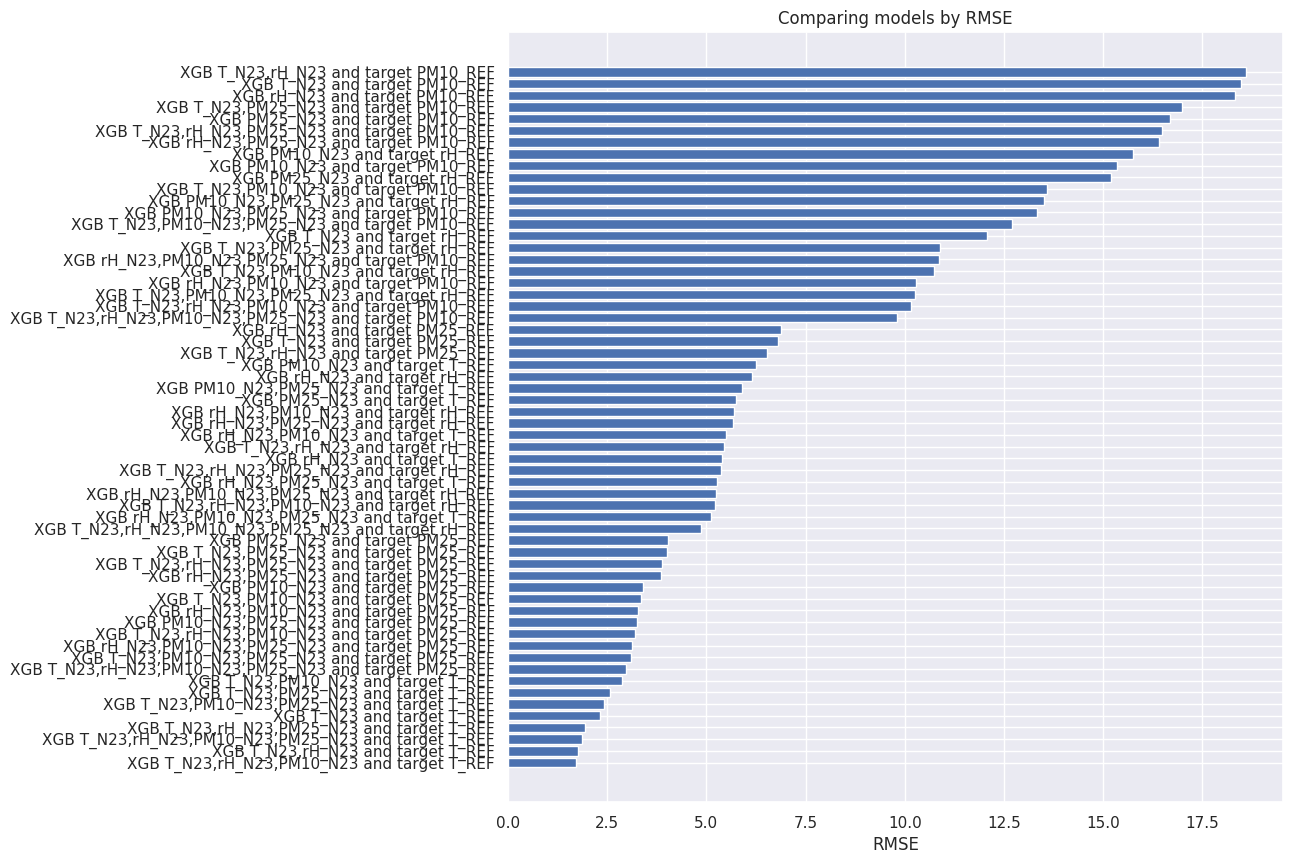

In [37]:
# sort model results by RMSE
sorted_results = sorted(all_results, key=lambda x: x.metrics['RMSE'])

plt.figure(figsize=(10, 10))
plt.title('Comparing models by RMSE')

plt.barh(
    [result.name for result in sorted_results],
    [result.metrics['RMSE'] for result in sorted_results]
)

plt.xlabel('RMSE')
plt.show()

In [38]:
for target in all_targets:
    plt.figure(figsize=(20, 20))
    plt.title('Matching models predictions')

    # actual values graph
    plt.plot(original_by_target[target].values[:100], label='ACTUAL', color='black')

    # models predictions graphs
    for result in model_results[target]:
        plt.plot(result.predictions[:100],
                linestyle='--',
                label=result.name)

    plt.xlabel('Time')
    plt.ylabel(target)

    plt.grid(True)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [39]:
pd.set_option('display.max_colwidth', None)

metrics_df = pd.DataFrame({
    result.name: result.metrics for i, result in zip(range(len(final_table_by_rmse)), final_table_by_rmse)
}).T

print('Model metrics:')
print(metrics_df.sort_values('RMSE', ascending=True))

Model metrics:
                                                                        R2  \
LinearRegression T_N23,rH_N23,PM10_N23,PM25_N23 and target T_REF  0.937956   
RandomForest T_N23,rH_N23,PM10_N23 and target T_REF               0.936303   
LinearRegression T_N23,rH_N23,PM10_N23 and target T_REF           0.932270   
LinearRegression T_N23,rH_N23 and target T_REF                    0.931769   
LinearRegression T_N23,rH_N23,PM25_N23 and target T_REF           0.931576   
...                                                                    ...   
XGB T_N23,rH_N23 and target PM10_REF                             -0.062507   
RandomForest T_N23,rH_N23 and target PM10_REF                    -0.077946   
RandomForest PM10_N23 and target rH_REF                          -0.618029   
RandomForest rH_N23 and target PM10_REF                          -0.247432   
RandomForest T_N23 and target PM10_REF                           -0.395599   

                                                